<h1>Convolutional Neural Network (CNN) for black and white image classifier</h1>

<h3><b>Name:</b> Aw Shao Yang</h3>
<h3><b>Class:</b> DAAA/FT/2B/03</h3>
<h3><b>Student ID:</b> p2012126</h3>

<p>
In part A of this project, we are expected to implement an image classifier using a deep learning convolutional neural network, hence I have decided to operate and create the network using the TensorFlow 2.0 library.
In order to create the Nerual Network model, I have coded to import the following tools which would help in the creation of my model
</p>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D,Flatten, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model 

## Data Exploration
<p>
Before building any neural network, it is essential that we take the time to do some data exploration for our dataset so that we can understand what exactly we are dealing as well as decide on certain things like the number of output nodes we expect etc.
</p>
<p> Since our dataset is based on images, we will have plot their pixels using matploltlibs graphs to view what object images we are classifying. To get a quick view of the images, I have plotted the first 25 entries of our train X dataset. Through the images we see that: 
</p> 
<ul>
    <li>Our images are based on identifying the type of clothing item , i.e shirt, shoes etc </li>
    <li>The images are only in black and white.</li>
    <li>There are more than 2 categories of clothing, hence we will need more output nodes </li>
<ul>

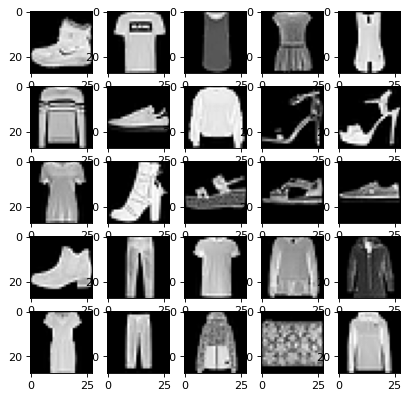

In [ ]:

from tensorflow.keras.datasets import fashion_mnist

seed = 99
np.random.seed(seed)
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

y_test_data = y_test

#Data images
plt.figure(figsize=(6,6 ), dpi=80)

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()


Through external research I have found that the classes of the image of items are classified as follows:
<br>0: T-shirt/top
<br>1: Trouser
<br>2: Pullover
<br>3: Dress
<br>4: Coat
<br>5: Sandal
<br>6: Shirt
<br>7: Sneaker
<br>8: Bag
<br>9: Ankle boot

Here is some information on the images we are dealing with

In [ ]:
print(f"Train sizes: (X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test sizes: (X_test: {X_test.shape},  (y_test: {y_test.shape}")
print("Unique Categories:", np.unique(y_train))

Train sizes: (X_train: (60000, 28, 28), y_train: (60000,)
Test sizes: (X_test: (10000, 28, 28),  (y_test: (10000,)
Unique Categories: [0 1 2 3 4 5 6 7 8 9]


Through analysing the dataset sizes and categories, we see that:
<ul>
<li>All of our images in the dataset are of pizel sizes of 28 x 28 
<li>In our training set, we have 60000 images to train our model while our test set has 10000 images
<li>Our dataset consists of 10 different categories of clothing
<li>The images are black and white, 
</ul>

<p>
Since our model has 10 different categories, we would set the final output layer to have only 10 nodes, 1 node for each category. 
</p>

<p>Next lets take a look at the distribution of the categories on the dataset's clothing category</p>

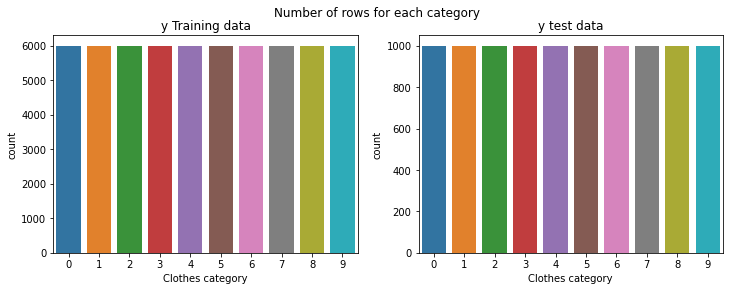

In [ ]:
import seaborn as sns
fig, (ax1, ax2)  = plt.subplots(1,2, figsize=(12, 4))

fig.suptitle('Number of rows for each category')
ax1.set_title('y Training data')
ax1.set_xlabel('Clothes category')
sns.countplot(x = y_train, ax=ax1)

ax2.set_title('y test data')
ax2.set_xlabel('Clothes category')
sns.countplot(x = y_test, ax=ax2)

The histogram below shows the distribution of pixel values in 50 of the fashion images

Here we see that this dataset is good as we have a equal count distrbution of each category of clothing meaning that there is no case of imbalanced classes in our dataset. 
Next we check to make sure that no null values exists in our image datasets to ensure that we have proper images for image classification training and testing 

In [ ]:
print("Null values in X_train: ", np.isnan(np.sum(X_train)))
print("Null values in y_train: ", np.isnan(np.sum(y_train)))
print("Null values in X_test: ", np.isnan(np.sum(X_test)))
print("Null values in y_test: ", np.isnan(np.sum(y_test)))

Null values in X_train:  False
Null values in y_train:  False
Null values in X_test:  False
Null values in y_test:  False


Here we take a look at the distribution of pixel values in some of our images in the dataset.

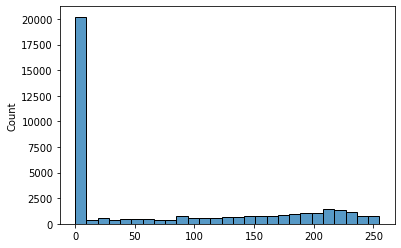

In [ ]:
sns.histplot(X_train[0:50].reshape(-1))
plt.show()

We see that the distribution of pixel values in the images are right skewed with most of the values concentrated at the value of 0 (black). This is likely due to all of the images having the same black background

## Basic Classification Model 


#### Data Preperation
<p>
Here I have decided to create and experiment on a basic non convolutional model, to create a basic image classification model, we would first need to conduct some data preperation with the currrent dataset that we have to make it suitable for model training and testing.

In a basic image classification model, the steps we would need to take in preparing our data are
<ol>
<li>Flatten the input image dimensions to 1 Dimensional 
<li>Normalize the image pixel values 
<li>One hot encode the categorical columns 
<li>Build the architecture and train the model 
</ol> 
</p>
First in order to fit our images and train our neural network, we would first need to flatten the image dimensions from the 2 dimensions with 1 channel into a 1 dimension array. Since our images are 28 by 28 pixels, each image would be a 784 pixel 1D array that would be sent into our model and used to train the Nerual Network. 

In [ ]:
#Reshaping the 2D data into 1D (flattening)
X_train_bm = X_train.reshape(60000, 784)
X_test_bm = X_test.reshape(10000, 784)
X_train_bm = X_train_bm.astype('float32')
X_test_bm = X_test_bm.astype('float32')

Next we will need to normalize our the image pixels for our images so that our gradients don't go out of control. This is good practice in NN models and it is to also help our network learn faster.

In [ ]:
X_train_bm /= 255
X_test_bm /= 255

Since deep learning neual networks in Keras and Tensorflow require all input and output features to be numerical, we need to ensure that our target variable only consists of numerical values. From data exploration, we see that the output variable is an integer from 0 to 9. However, since this is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix. 

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#number of output nodes
num_of_classes = y_test.shape[1]
y_train[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

#### Basic neural network architecture and training

Now we will need to build the architechture for our basic classification model before training it. To build our deep learning model, we will require 3 types of layers
<ul>
<li>Input layer where we put our input variables</li>
<li>Hidden layers which are layers of nodes between the input and output layers</li>
<li>Output layer, the layer that produces the outputs</li>
</ul>
Since this is just a basic model that I am building, and not the convolutional neural network that is needed to be built, I will not hyper tune the model, I will just experiement to see where a basic neural network model stands. Below I created a basic model with an:
<br>1. input of 784 nodes 
<br>2. 1 hidden layer with 64 nodes and relu activation function 
<br>3. output layer with 10 output nodes and a softmax activation function 

In [ ]:
bm_model = Sequential()
bm_model.add(Dense(64, input_shape = (784,),activation='relu'))
bm_model.add(Dense(10, activation='softmax'))

bm_model.summary()
bm_model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer = 'adam')
history = bm_model.fit(X_train_bm, y_train, batch_size=100, epochs=30, validation_data = (X_test_bm, y_test))

# Final evaluation of the model
scores = bm_model.evaluate(X_test_bm, y_test, verbose=0)
print("Minimum error: ", 100-max(history.history['val_accuracy'])*100)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 0.5725 - accuracy: 0.8032 - val_loss: 0.4766 - val_accuracy: 0.8301
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.4182 - accuracy: 0.8534 - val_loss: 0.4414 - val_accuracy: 0.8464
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 0.3831 - accuracy: 0.8643 - val_loss: 0.4186 - val_accuracy: 0.8535
Epoch 4/30
600/600 [

In [ ]:
bm_model.save('models/basic_model')

INFO:tensorflow:Assets written to: models/basic_model/assets


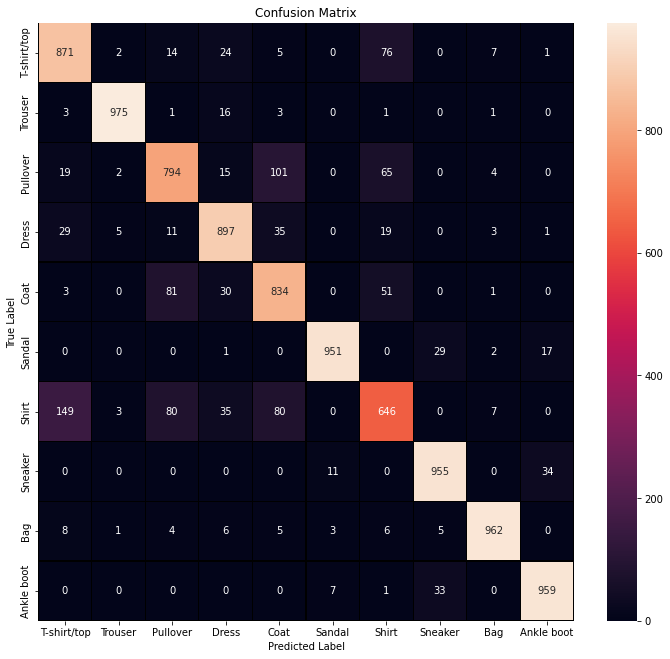

In [ ]:
bm_model = load_model('models/basic_model')
y_pred = bm_model.predict(X_test_bm)
y_pred_classes = np.argmax(y_pred, axis= 1)
y_true = np.argmax(y_test, axis=1 )
cm = confusion_matrix(y_true, y_pred_classes)

f,ax = plt.subplots(figsize = (12,11))
cm_df = pd.DataFrame(cm, columns= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'], index= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
sns.heatmap(cm_df, annot=True, linewidths=0.1, linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Through the heatmap, we obsereve that in a basic Neural Network the classes that get predicted wrongly the most are: Shirt, Coat, pullover and T-shirt. 

The reason as for why the model does not perform well in predicting these is most likely it having similar shape forms in their pixels.  

The model performs the best on bags most likely due to little look alike objects in classes unlike shirts, tshirts coats and pullovers

#### Basic Neural Network metric epochs visulisation

Through the training and testing of our basic neural network above we see that our model has gotten a validation accuracy of around 88%. This is not exactly a very high accuracy, but the score is generally decent especially because this is just a basic model that has been developed without CNN nor hypertuning. 
Now lets take a look at the basic model's training history for its accuracy and loss as it can provide a good indication of some useful information about our current model such as:
<ul>
<li>Where in epoch does the model converge</li>
<li>Where the model may be overfitting the training data</li>
<li>Whether or not we should continue training</li>
<ul>


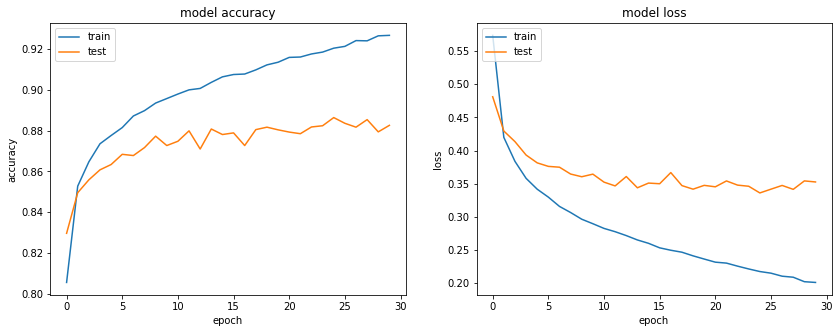

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

Since the main idea of this project is not to build a basic neural network model, but to create a Convolutional Neural Network, I will not continue with hypertuning and analysing this basic models metrics and move on to creating a CNN. This small analysis of the basic NN was to get a basic idea on the accuracy of just a simple NN for this dataset. 

## Convolutional Neural Network
<p>Now I will start on creating the convolutional neural network model that we will hypertune and hopefully get the best model with the best metrics</p>
<p>We would expect for convolutional neural networks to perform better than classical neural networks on images due to the ability of convolutional layers taking advantage of the images inherent properties. CNNs are also very effective in reducing the number of parameters without losing on the quality of the models making it better to tune and train models.</p>

### Data preperation for CNN
<p>First we will need to reprepare some of our data as when developing a convolutional neural network, we do not need to flatten the input images to 1D since they are able to work using image data that are 2 Dimensional. However we do need to reshape the dataset to have a single channnel before training it in our model, then we have to convert it to float and normalize it to rescale it between [0 and 1] through division</p>

In [ ]:
#Reshape data for single channel 
X_train_cn = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_cn = X_test.reshape((X_test.shape[0], 28, 28, 1))


#Conversion of int to float
X_train_cn = X_train_cn.astype('float32')
X_test_cn = X_test_cn.astype('float32')

#Data normalization for pixels
X_train_cn = X_train_cn/255.0
X_test_cn = X_test_cn/255.0

As for the target variable for the type of clothing, we will still need to use the one hot encoded version of it as there are still 10 output variables. We will also have 10 output nodes for our CNN model 

In [ ]:
#Top 5 y_train rows
y_train[:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

<h3>CNN Architecture and training</h3>
<p>Now we will have to build the CNN architecture for our models to have a baseline CNN model for training and testing to see where it stands based on its performance in predicting the clothing type based on the image pixels. What I have done here was create a CNN with:
<ul>
<li> Convolutional layer with 32 filters and kernals of size 5x5 
<li> pooling layer that takes max over 2x2 patches 
<li> A Flatten layer 
<li> As well as a fully connected layer with 64 neurons and a relu function 
</ul>
</p>

In [ ]:
from tensorflow.keras import optimizers

cn_model1 = Sequential()
cn_model1.add(Conv2D(32, (5,5), input_shape=(28,28,1), activation='relu'))
cn_model1.add(MaxPooling2D(pool_size=(2,2)))
cn_model1.add(Flatten())
cn_model1.add(Dense(64, activation='relu'))
cn_model1.add(Dense(10, activation='softmax'))
cn_model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cn1 = cn_model1.fit(X_train_cn, y_train, epochs=30, batch_size=100, validation_data=(X_test_cn, y_test))
scores = cn_model1.evaluate(X_test_cn,  y_test, verbose=0)
print(f"Minimum Error:", 100-max(history_cn1.history['val_accuracy'])*100)


Epoch 1/30
600/600 [==============================] - 4s 7ms/step - loss: 0.4819 - accuracy: 0.8297 - val_loss: 0.3788 - val_accuracy: 0.8669
Epoch 2/30
600/600 [==============================] - 4s 6ms/step - loss: 0.3195 - accuracy: 0.8887 - val_loss: 0.3164 - val_accuracy: 0.8870
Epoch 3/30
600/600 [==============================] - 4s 6ms/step - loss: 0.2767 - accuracy: 0.8998 - val_loss: 0.2889 - val_accuracy: 0.8967
Epoch 4/30
600/600 [==============================] - 4s 6ms/step - loss: 0.2498 - accuracy: 0.9111 - val_loss: 0.2862 - val_accuracy: 0.8960
Epoch 5/30
600/600 [==============================] - 4s 6ms/step - loss: 0.2277 - accuracy: 0.9173 - val_loss: 0.2792 - val_accuracy: 0.8968
Epoch 6/30
600/600 [==============================] - 4s 6ms/step - loss: 0.2104 - accuracy: 0.9230 - val_loss: 0.2647 - val_accuracy: 0.9052
Epoch 7/30
600/600 [==============================] - 4s 6ms/step - loss: 0.1948 - accuracy: 0.9287 - val_loss: 0.2565 - val_accuracy: 0.9093
Epoch 

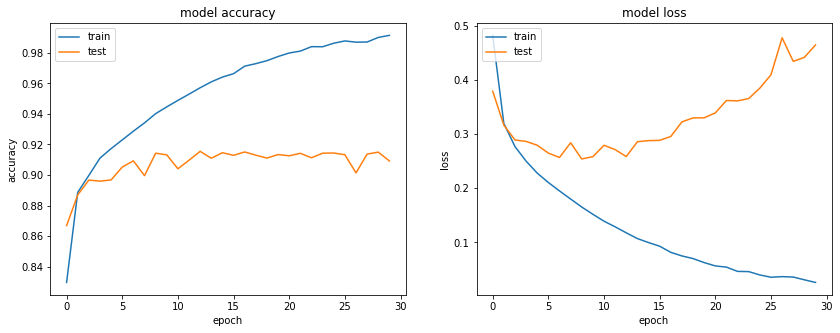

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.plot(history_cn1.history['accuracy'])
ax1.plot(history_cn1.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(history_cn1.history['loss'])
ax2.plot(history_cn1.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
cn_model1.save('models/cnn_model')

INFO:tensorflow:Assets written to: models/cnn_model/assets


Through training and testing using a CNN model without tuning any hyperparameters, we see that there has been a significant improvement in the accuracy score for the model. We see that now our CNN model has an accuracy score of 91% which is 3% more than what we had achieved in the previous simple NN. 

However we do see that the model is overfitting as the gap between the training and testing scores are already increasing around the start

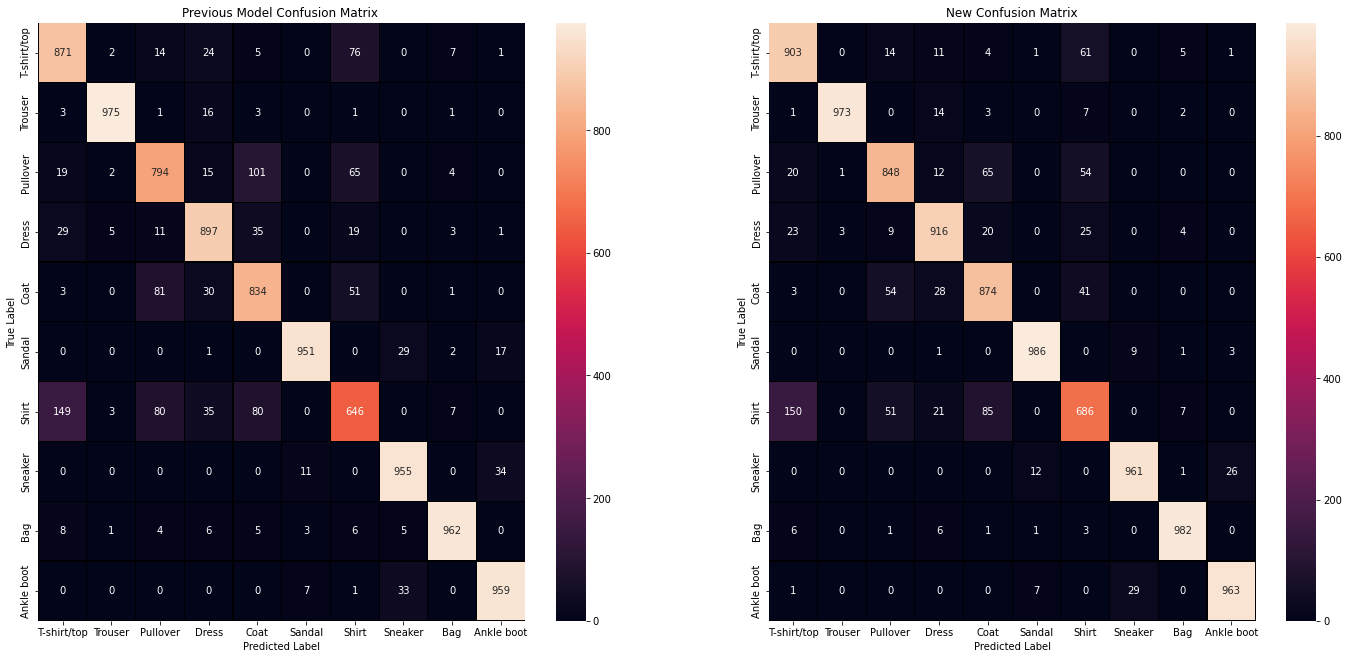

In [ ]:
bm_model = load_model('models/basic_model')
y_pred_prev = bm_model.predict(X_test_bm)
y_pred_classes_prev = np.argmax(y_pred_prev, axis= 1)
y_true = np.argmax(y_test, axis=1 )
cm_prev = confusion_matrix(y_true, y_pred_classes_prev)

cn_model1 = load_model('models/cnn_model')
y_pred = cn_model1.predict(X_test_cn)
y_pred_classes = np.argmax(y_pred, axis= 1)
cm = confusion_matrix(y_true, y_pred_classes)

f,(ax1,ax2) = plt.subplots(1,2,figsize = (24,11))
cm_df_prev = pd.DataFrame(cm_prev, columns= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'], index= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
cm_df = pd.DataFrame(cm, columns= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'], index= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
sns.heatmap(cm_df_prev, annot=True, linewidths=0.1, linecolor="black", fmt='.0f', ax=ax1)
sns.heatmap(cm_df, annot=True, linewidths=0.1, linecolor="black", fmt='.0f', ax=ax2)
ax1.set_xlabel("Predicted Label")
ax1.set_ylabel("True Label")
ax1.set_title("Previous Model Confusion Matrix ")
ax2.set_xlabel("Predicted Label")
ax2.set_ylabel("True Label")
ax2.set_title("New Confusion Matrix")
plt.show()

Through the heat map of the confusion matrix, we see that the model improvements were mainly in: 
* Slightly more correct T shirts/top
* More pullover correct
* More correct dresses
* More coats were predicted correctly (Lesser coats predicted as pull overs)
* More correct sandles 
* More Shirts were being predicted correctly. (Lesser Shirts were predicted as T shirts/tops)
* Improvement in sneaker 
* Better bag predictions 
* As well as Ankle boots

However there was also some deprovements such as:
* Predictions for trousers worsened 

### Hyper parameter optimization
Now we will have to hyper tune the model to see if we can achieve a model with less overfitting and higher accuracy scores for testing. The first way to hyper tune our model would be tuning its nodes and layers to try an achieve a better model to improve the scores scores and accuracy. The layers here that we can tune would be the:
*  Hidden Layers and their nodes
*  Conv2D layers, their filters and their kernal sizes 
*  Pooling layers



#### Adjusting hidden layers
The first thing I will be trying is adjusting the hidden layers and their nodes. What I have done here was add 2 more hidden layers with 64 nodes and 32 nodes respectively. 

In [ ]:
cn_model = Sequential()
cn_model.add(Conv2D(32, (5,5), input_shape=(28,28,1), activation='relu'))
cn_model.add(MaxPooling2D(pool_size=(2,2)))
cn_model.add(Flatten())
cn_model.add(Dense(128, activation='relu'))
cn_model.add(Dense(64, activation='relu'))
cn_model.add(Dense(32, activation='relu'))
cn_model.add(Dense(10, activation='softmax'))
cn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cn = cn_model.fit(X_train_cn, y_train, epochs=30, batch_size=100, validation_data=(X_test_cn, y_test))
scores = cn_model.evaluate(X_test_cn,  y_test, verbose=0)
print(f"Minimum Error:", 100-max(history_cn.history['val_accuracy'])*100)

Epoch 1/30
600/600 [==============================] - 5s 8ms/step - loss: 0.5155 - accuracy: 0.8153 - val_loss: 0.3906 - val_accuracy: 0.8619
Epoch 2/30
600/600 [==============================] - 4s 7ms/step - loss: 0.3289 - accuracy: 0.8840 - val_loss: 0.3209 - val_accuracy: 0.8816
Epoch 3/30
600/600 [==============================] - 5s 8ms/step - loss: 0.2785 - accuracy: 0.8993 - val_loss: 0.3060 - val_accuracy: 0.8907
Epoch 4/30
600/600 [==============================] - 4s 7ms/step - loss: 0.2457 - accuracy: 0.9109 - val_loss: 0.2920 - val_accuracy: 0.8969
Epoch 5/30
600/600 [==============================] - 4s 7ms/step - loss: 0.2232 - accuracy: 0.9184 - val_loss: 0.2599 - val_accuracy: 0.9058
Epoch 6/30
600/600 [==============================] - 4s 7ms/step - loss: 0.2034 - accuracy: 0.9240 - val_loss: 0.2480 - val_accuracy: 0.9101
Epoch 7/30
600/600 [==============================] - 4s 7ms/step - loss: 0.1842 - accuracy: 0.9304 - val_loss: 0.2693 - val_accuracy: 0.9071
Epoch 

We see that the scores were reletively similar to just having 1 layer Dense of nodes 

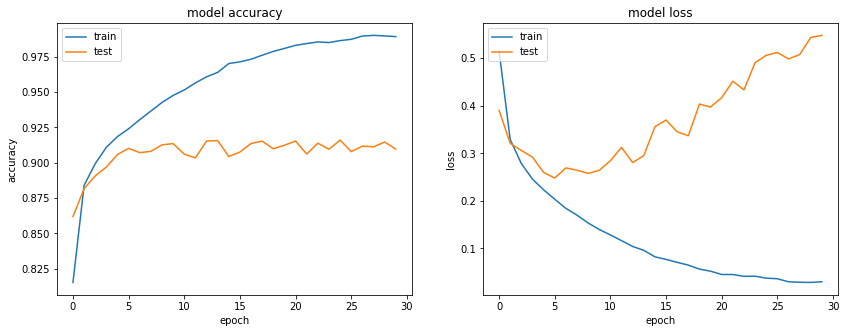

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.plot(history_cn.history['accuracy'])
ax1.plot(history_cn.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(history_cn.history['loss'])
ax2.plot(history_cn.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

Looking at the graphs above, we see that through the inclusion of more hidden layers the models training score improves yet the testing score starts overfitting at an earlier epoch. We also see that there is no improvement in the model test accuracy, the models test accuracy also started to fluctuate more as compared to just 1 layer. Hence I did not increase the number of hidden layers for my model



#### Hidden layer nodes adjustment
Next I will try to improve the model by adjusting the number of nodes on just that one layer. The number node I have tried are 32,64,128, 256 and 512

In [ ]:
nodes = [32, 64, 128, 256, 512]
nodes_df = pd.DataFrame({'Nodes': [], 'Baseline Error': []})
for i in nodes: 
  cn_model = Sequential()
  cn_model.add(Conv2D(32, (5,5), input_shape=(28,28,1), activation='relu'))
  cn_model.add(MaxPooling2D(pool_size=(2,2)))
  cn_model.add(Flatten())
  cn_model.add(Dense(i, activation='relu'))
  cn_model.add(Dense(10, activation='softmax'))
  cn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history_cn = cn_model.fit(X_train_cn, y_train, epochs=30, batch_size=100, validation_data=(X_test_cn, y_test), verbose = 0)
  scores = cn_model.evaluate(X_test_cn,  y_test)
  print(f"Nodes: {i}, Minimum Error:", 100-max(history_cn.history['val_accuracy'])*100)


313/313 [==============================] - 1s 4ms/step - loss: 0.3482 - accuracy: 0.9079
Nodes: 32, Minimum Error: 8.810001611709595
313/313 [==============================] - 1s 4ms/step - loss: 0.4242 - accuracy: 0.9093
Nodes: 64, Minimum Error: 8.179998397827148
313/313 [==============================] - 1s 4ms/step - loss: 0.5116 - accuracy: 0.9131
Nodes: 128, Minimum Error: 8.230000734329224
313/313 [==============================] - 1s 4ms/step - loss: 0.5593 - accuracy: 0.9134
Nodes: 256, Minimum Error: 7.980000972747803
313/313 [==============================] - 2s 4ms/step - loss: 0.5780 - accuracy: 0.9163
Nodes: 512, Minimum Error: 8.219999074935913


Looking at the results above, it would appear that through the increase in nodes, there is also an increase in model accuracy hence I will increase the number of nodes on my model from an initial 64 to 256. 


#### Creating a more complex model 

In order to improve my models performance in deep learning, I have decided to try to make a more complex model. I did this by mainly trying to introduce more layers in the model, especially the Conv2D layers and Pooling2D layers. This was done in hopes of obtaining a better accuracy model and with lesser overfitting. 

The first method I attempted in making my model even more complex was introducing more Convolutional layers and MaxPooling layers  

In conv2d, its filter and kernal detects a specific type of feature in the input, then applies the filter systematically across the entire input image allowing the filter to discover that feature anywhere in the image.

As for the pooling layer, it reduces the spatial size of the representation to reduce the amount of parameters and computation in the network. It provides the ability to learn invariant features and also acts as a regularizer to further reduce the problem of overfitting. 

#### 2 Conv2D and Pooling Layers
Since the images were relatively small I decided to have kernal size of 3x3 
My first attempt of a more complex model was a model with:
* Conv2D (32 filters) kernal 3x3 
* MaxPooling2D (pool_size (2,2))
* Conv2D (64 filters) kernal 3x3 
* MaxPooling2D (pool_size (2,2))


In [ ]:
cn_model = Sequential()
cn_model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
cn_model.add(MaxPooling2D(pool_size=(2,2)))
cn_model.add(Conv2D(64, (3,3), activation='relu'))
cn_model.add(MaxPooling2D(pool_size=(2,2)))
cn_model.add(Flatten())
cn_model.add(Dense(256, activation='relu'))
cn_model.add(Dense(10, activation='softmax'))
cn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cn = cn_model.fit(X_train_cn, y_train, epochs=30, batch_size=100, validation_data=(X_test_cn, y_test))
scores = cn_model.evaluate(X_test_cn,  y_test, verbose=0)
print(f"Minimum Error:", 100-max(history_cn.history['val_accuracy'])*100)

Epoch 1/30
600/600 [==============================] - 6s 9ms/step - loss: 0.4857 - accuracy: 0.8259 - val_loss: 0.3668 - val_accuracy: 0.8686
Epoch 2/30
600/600 [==============================] - 5s 8ms/step - loss: 0.3187 - accuracy: 0.8843 - val_loss: 0.3146 - val_accuracy: 0.8858
Epoch 3/30
600/600 [==============================] - 5s 8ms/step - loss: 0.2729 - accuracy: 0.8995 - val_loss: 0.3100 - val_accuracy: 0.8835
Epoch 4/30
600/600 [==============================] - 5s 9ms/step - loss: 0.2410 - accuracy: 0.9110 - val_loss: 0.2676 - val_accuracy: 0.9020
Epoch 5/30
600/600 [==============================] - 5s 8ms/step - loss: 0.2177 - accuracy: 0.9194 - val_loss: 0.2770 - val_accuracy: 0.9021
Epoch 6/30
600/600 [==============================] - 5s 8ms/step - loss: 0.1963 - accuracy: 0.9267 - val_loss: 0.2607 - val_accuracy: 0.9051
Epoch 7/30
600/600 [==============================] - 5s 9ms/step - loss: 0.1760 - accuracy: 0.9344 - val_loss: 0.2519 - val_accuracy: 0.9103
Epoch 

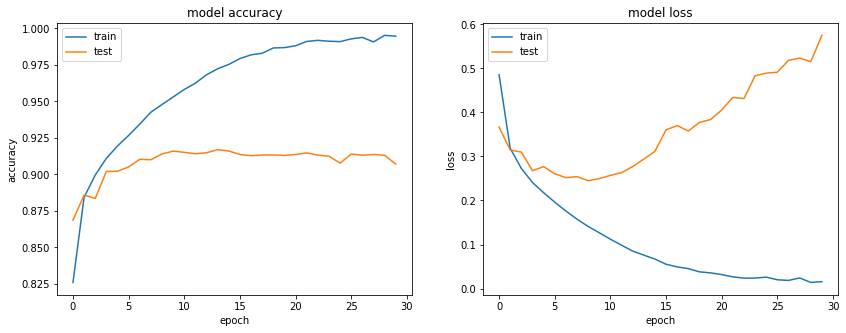

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.plot(history_cn.history['accuracy'])
ax1.plot(history_cn.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(history_cn.history['loss'])
ax2.plot(history_cn.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

Taking a look at the results above, we see that there was not really any significant improvement in the models accuracy. However, if we compare it with the previous 1 layered CNN model, we see generally lesser fluctuations in the testing accuracy, as well as being able to reach an accuracy of 9.1 > even quicker. Hence I decided to keep this change in my model  

#### 3 Conv2D and Pooling Layers
The next model I decided to try was adding another Conv2D and MaxPooling layer to the model. So now the model here has the following Convolutional layers:
* Conv2D (32 filters) kernal 3x3 
* MaxPooling2D (pool_size (2,2))
* Conv2D (64 filters) kernal 3x3 
* MaxPooling2D (pool_size (2,2))
* Conv2D (128 filters) kernal 3x3 
* MaxPooling2D (pool_size (2,2))

Why I increased filters as I increase in layers was due to larger combinations of patterns to capture, as when we move foward in the layers, the patterns get more complex. 


In [ ]:
cn_model = Sequential()
cn_model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
cn_model.add(MaxPooling2D(pool_size=(2,2)))
cn_model.add(Conv2D(64, (3,3), activation='relu'))
cn_model.add(MaxPooling2D(pool_size=(2,2)))
cn_model.add(Conv2D(128, (3,3), activation='relu'))
cn_model.add(MaxPooling2D(pool_size=(2,2)))
cn_model.add(Flatten())
cn_model.add(Dense(256, activation='relu'))
cn_model.add(Dense(10, activation='softmax'))
cn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cn = cn_model.fit(X_train_cn, y_train, epochs=30, batch_size=100, validation_data=(X_test_cn, y_test))
scores = cn_model.evaluate(X_test_cn,  y_test, verbose=0)
print(f"Minimum Error:", 100-max(history_cn.history['val_accuracy'])*100)

Epoch 1/30
600/600 [==============================] - 8s 13ms/step - loss: 0.6548 - accuracy: 0.7585 - val_loss: 0.4928 - val_accuracy: 0.8191
Epoch 2/30
600/600 [==============================] - 8s 13ms/step - loss: 0.4240 - accuracy: 0.8447 - val_loss: 0.4170 - val_accuracy: 0.8497
Epoch 3/30
600/600 [==============================] - 8s 13ms/step - loss: 0.3625 - accuracy: 0.8662 - val_loss: 0.3846 - val_accuracy: 0.8613
Epoch 4/30
600/600 [==============================] - 7s 12ms/step - loss: 0.3263 - accuracy: 0.8790 - val_loss: 0.3627 - val_accuracy: 0.8681
Epoch 5/30
600/600 [==============================] - 7s 12ms/step - loss: 0.2941 - accuracy: 0.8910 - val_loss: 0.3224 - val_accuracy: 0.8828
Epoch 6/30
600/600 [==============================] - 8s 13ms/step - loss: 0.2725 - accuracy: 0.8975 - val_loss: 0.3148 - val_accuracy: 0.8822
Epoch 7/30
600/600 [==============================] - 8s 13ms/step - loss: 0.2520 - accuracy: 0.9064 - val_loss: 0.3118 - val_accuracy: 0.8872

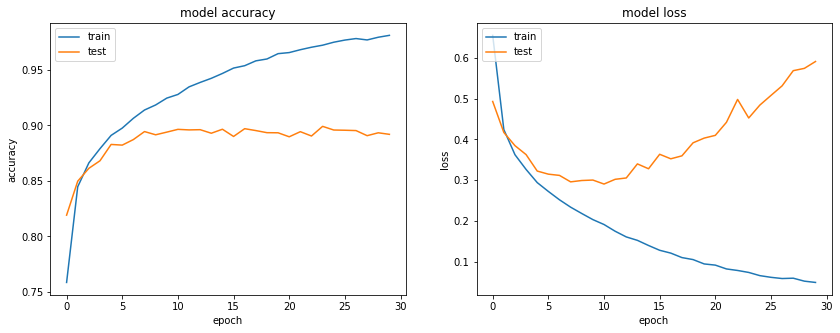

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.plot(history_cn.history['accuracy'])
ax1.plot(history_cn.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(history_cn.history['loss'])
ax2.plot(history_cn.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

Looking at the results from a 3 layered Conv2D and Maxpooling model, we see that the after adding the 3rd layer, the model deproved quite a bit when predicting the test data. We observe lower accuracy scores for the test data and earlier overfitting between the train and test accuracy scores. Hence it appears that increasing the models sets of Conv2D and Maxpooling of more than 3 worsens the model's performance. From the results I decided to keep my Maxpooling to only 2 layers. 


#### Stacked Conv2D layers
The next way I tried to improve the model by complexity was through just adding more layers of Conv2D. Meaning that I tried to stack Conv2D layers on top of each other. By stacking just Conv2D layers, I feel that it has more flexibility in expressing non-linear transformations without loosing information as Maxpooling removes information, so by having multiple Conv layers, we can build up better representations of the data without losing all of the spatial information too quickly. The model architecture is:
* Conv2D (32 filters) kernal 3x3 
* Conv2D (32 filters) kernal 3x3 
* MaxPooling2D (pool_size (2,2))
* Conv2D (64 filters) kernal 3x3 
* Conv2D (64 filters) kernal 3x3 
* MaxPooling2D (pool_size (2,2))

In [ ]:
cn_model2 = Sequential()
cn_model2.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
cn_model2.add(Conv2D(32, (3,3),activation='relu'))
cn_model2.add(MaxPooling2D(pool_size=(2,2)))

cn_model2.add(Conv2D(64, (3,3), activation='relu'))
cn_model2.add(Conv2D(64, (3,3), activation='relu'))
cn_model2.add(MaxPooling2D(pool_size=(2,2)))

cn_model2.add(Flatten())
cn_model2.add(Dense(256, activation='relu'))
cn_model2.add(Dense(10, activation='softmax'))
cn_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cn2 = cn_model2.fit(X_train_cn, y_train, epochs=30, batch_size=100, validation_data=(X_test_cn, y_test))
scores = cn_model2.evaluate(X_test_cn,  y_test, verbose=0)
print(f"Minimum Error:", 100-max(history_cn2.history['val_accuracy'])*100)

Epoch 1/30
600/600 [==============================] - 10s 15ms/step - loss: 0.5222 - accuracy: 0.8076 - val_loss: 0.3807 - val_accuracy: 0.8610
Epoch 2/30
600/600 [==============================] - 9s 15ms/step - loss: 0.3164 - accuracy: 0.8830 - val_loss: 0.2963 - val_accuracy: 0.8921
Epoch 3/30
600/600 [==============================] - 9s 15ms/step - loss: 0.2615 - accuracy: 0.9042 - val_loss: 0.2768 - val_accuracy: 0.8989
Epoch 4/30
600/600 [==============================] - 9s 15ms/step - loss: 0.2318 - accuracy: 0.9144 - val_loss: 0.2479 - val_accuracy: 0.9097
Epoch 5/30
600/600 [==============================] - 9s 15ms/step - loss: 0.2047 - accuracy: 0.9230 - val_loss: 0.2440 - val_accuracy: 0.9117
Epoch 6/30
600/600 [==============================] - 9s 15ms/step - loss: 0.1845 - accuracy: 0.9316 - val_loss: 0.2449 - val_accuracy: 0.9122
Epoch 7/30
600/600 [==============================] - 9s 15ms/step - loss: 0.1651 - accuracy: 0.9388 - val_loss: 0.2452 - val_accuracy: 0.913

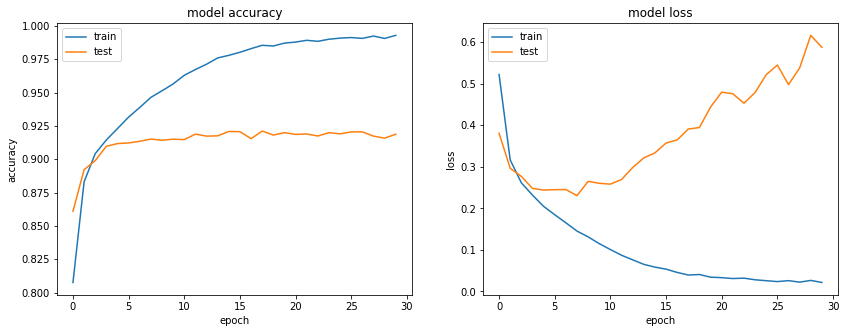

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.plot(history_cn2.history['accuracy'])
ax1.plot(history_cn2.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(history_cn2.history['loss'])
ax2.plot(history_cn2.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

Looking at the new model, we see that there has been some improvements in terms of the models performance. Initially with a 2 1 layered Conv2D and MaxPooling architecture, it was only capable of obtaining a validation accuracy of less than around 91.8%. 

However, now by stacking Convolutional layers on top of each other, we were able to obtain a model that is able to score around a bare 92 % validation accuracy 

Hence I will keep this change in the model. 


Since the model gained more accuracy from increasing the number of Conv2D layers through stacking, I have decided to try increasing it again, below is a model with 3 layers of Conv2D per stack:

* Conv2D (32 filters) kernal 3x3 
* Conv2D (32 filters) kernal 3x3 
* Conv2D (32 filters) kernal 3x3 
* MaxPooling2D (pool_size (2,2))
* Conv2D (64 filters) kernal 3x3 
* Conv2D (64 filters) kernal 3x3 
* Conv2D (64 filters) kernal 3x3 
* MaxPooling2D (pool_size (2,2))


In [ ]:
cn_model = Sequential()
cn_model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'))
cn_model.add(Conv2D(32, (3,3),activation='relu'))
cn_model.add(Conv2D(32, (3,3),activation='relu'))
cn_model.add(MaxPooling2D(pool_size=(2,2)))

cn_model.add(Conv2D(64, (3,3), activation='relu'))
cn_model.add(Conv2D(64, (3,3), activation='relu'))
cn_model.add(Conv2D(64, (3,3), activation='relu'))
cn_model.add(MaxPooling2D(pool_size=(2,2)))

cn_model.add(Flatten())
cn_model.add(Dense(256, activation='relu'))
cn_model.add(Dense(10, activation='softmax'))
cn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cn = cn_model.fit(X_train_cn, y_train, epochs=30, batch_size=100, validation_data=(X_test_cn, y_test))
scores = cn_model.evaluate(X_test_cn,  y_test, verbose=0)
print(f"Minimum Error:", 100-max(history_cn.history['val_accuracy'])*100)

Epoch 1/30
600/600 [==============================] - 13s 20ms/step - loss: 0.6173 - accuracy: 0.7657 - val_loss: 0.4577 - val_accuracy: 0.8270
Epoch 2/30
600/600 [==============================] - 12s 20ms/step - loss: 0.3801 - accuracy: 0.8598 - val_loss: 0.3449 - val_accuracy: 0.8754
Epoch 3/30
600/600 [==============================] - 12s 19ms/step - loss: 0.3108 - accuracy: 0.8872 - val_loss: 0.3165 - val_accuracy: 0.8880
Epoch 4/30
600/600 [==============================] - 12s 20ms/step - loss: 0.2718 - accuracy: 0.9008 - val_loss: 0.2953 - val_accuracy: 0.8918
Epoch 5/30
600/600 [==============================] - 12s 19ms/step - loss: 0.2498 - accuracy: 0.9084 - val_loss: 0.2645 - val_accuracy: 0.9076
Epoch 6/30
600/600 [==============================] - 12s 19ms/step - loss: 0.2324 - accuracy: 0.9136 - val_loss: 0.2613 - val_accuracy: 0.9035
Epoch 7/30
600/600 [==============================] - 12s 20ms/step - loss: 0.2133 - accuracy: 0.9212 - val_loss: 0.2827 - val_accuracy:

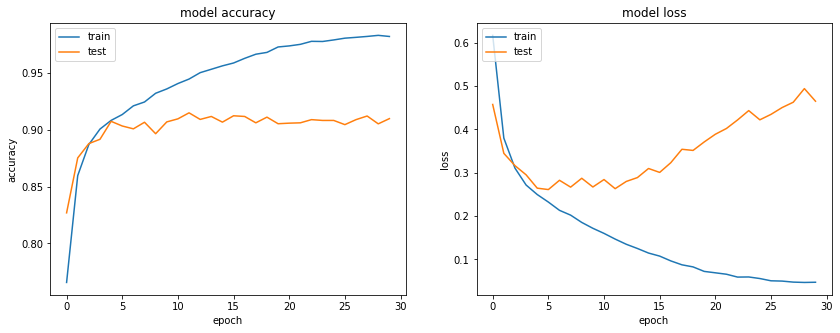

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.plot(history_cn.history['accuracy'])
ax1.plot(history_cn.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(history_cn.history['loss'])
ax2.plot(history_cn.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

Through a 3rd layer of Conv2D per stack, we see that the model has deproved in performance as not only does the model overfit, but its prediction accuracy even worse now as compared to before. We see that the validation accuracy is now not even able to score at least a 0.92.

The next thing I decided to try adjusting was increasesing the number of filters for the current Conv2D stacks that I have to make the model more complex. I increased them by doubling their current number of  filters:
* First stack --> 32 to 64
* Second stack --> 64 to 128

In [ ]:
cn_model = Sequential()
cn_model.add(Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'))
cn_model.add(Conv2D(64, (3,3),activation='relu'))
cn_model.add(MaxPooling2D(pool_size=(2,2)))

cn_model.add(Conv2D(128, (3,3), activation='relu'))
cn_model.add(Conv2D(128, (3,3), activation='relu'))
cn_model.add(MaxPooling2D(pool_size=(2,2)))

cn_model.add(Flatten())
cn_model.add(Dense(256, activation='relu'))
cn_model.add(Dense(10, activation='softmax'))
cn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cn = cn_model.fit(X_train_cn, y_train, epochs=30, batch_size=100, validation_data=(X_test_cn, y_test))
scores = cn_model.evaluate(X_test_cn,  y_test, verbose=0)
print(f"Minimum Error:", 100-max(history_cn.history['val_accuracy'])*100)

Epoch 1/30
600/600 [==============================] - 15s 23ms/step - loss: 0.4735 - accuracy: 0.8249 - val_loss: 0.3277 - val_accuracy: 0.8813
Epoch 2/30
600/600 [==============================] - 14s 24ms/step - loss: 0.2867 - accuracy: 0.8943 - val_loss: 0.2963 - val_accuracy: 0.8900
Epoch 3/30
600/600 [==============================] - 14s 23ms/step - loss: 0.2345 - accuracy: 0.9141 - val_loss: 0.2577 - val_accuracy: 0.9052
Epoch 4/30
600/600 [==============================] - 14s 24ms/step - loss: 0.2004 - accuracy: 0.9257 - val_loss: 0.2265 - val_accuracy: 0.9191
Epoch 5/30
600/600 [==============================] - 13s 22ms/step - loss: 0.1740 - accuracy: 0.9364 - val_loss: 0.2266 - val_accuracy: 0.9203
Epoch 6/30
600/600 [==============================] - 13s 22ms/step - loss: 0.1491 - accuracy: 0.9448 - val_loss: 0.2243 - val_accuracy: 0.9209
Epoch 7/30
600/600 [==============================] - 14s 23ms/step - loss: 0.1254 - accuracy: 0.9536 - val_loss: 0.2310 - val_accuracy:

As compared to lower values of filters, it appears that the model with higher filter values are doing slightly better as we see from the val_accuracy results that the score for this model is generally slightly higher than the bare 0.92, hence I kept my model to have 64 and 128 filters

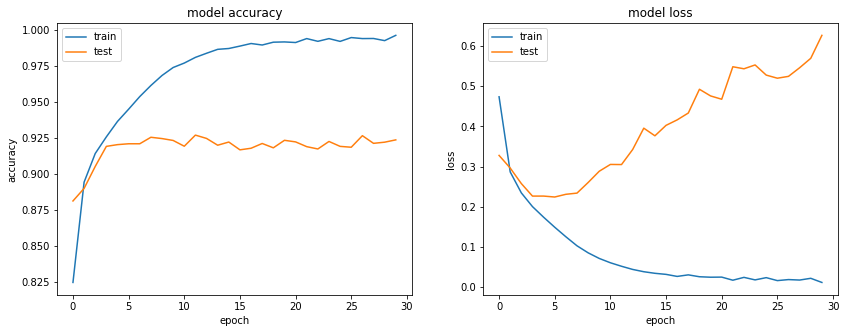

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.plot(history_cn.history['accuracy'])
ax1.plot(history_cn.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(history_cn.history['loss'])
ax2.plot(history_cn.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

#### Inclusion of padding 
Another thing that we can adjust for convolutional layers, would be padding the layers. The convoulutional layers reduce the size of the output, padding is added to the outer frame of the image to allow for more space for the filter to cover in the image. 

Adding padding to an image processed can also allow for a more accurate analysis of images.
* Conv2D (64 filters) kernal 3x3 (padding: same) 
* Conv2D (64 filters) kernal 3x3 (padding: same)
* MaxPooling2D (pool_size (2,2))
* Conv2D (128 filters) kernal 3x3 (padding: same)
* Conv2D (128 filters) kernal 3x3 (padding: same)
* MaxPooling2D (pool_size (2,2))

In [ ]:
cn_model3 = Sequential()
cn_model3.add(Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu', padding="same"))
cn_model3.add(Conv2D(64, (3,3),activation='relu', padding="same"))
cn_model3.add(MaxPooling2D(pool_size=(2,2)))

cn_model3.add(Conv2D(128, (3,3), activation='relu', padding="same"))
cn_model3.add(Conv2D(128, (3,3), activation='relu', padding="same"))
cn_model3.add(MaxPooling2D(pool_size=(2,2)))

cn_model3.add(Flatten())
cn_model3.add(Dense(256, activation='relu'))
cn_model3.add(Dense(10, activation='softmax'))
cn_model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cn3 = cn_model3.fit(X_train_cn, y_train, epochs=30, batch_size=100, validation_data=(X_test_cn, y_test))
scores = cn_model3.evaluate(X_test_cn,  y_test, verbose=0)
print(f"Minimum Error:", 100-max(history_cn3.history['val_accuracy'])*100)

Epoch 1/30
600/600 [==============================] - 19s 30ms/step - loss: 0.3964 - accuracy: 0.8542 - val_loss: 0.2888 - val_accuracy: 0.8967
Epoch 2/30
600/600 [==============================] - 17s 29ms/step - loss: 0.2316 - accuracy: 0.9164 - val_loss: 0.2291 - val_accuracy: 0.9154
Epoch 3/30
600/600 [==============================] - 17s 29ms/step - loss: 0.1871 - accuracy: 0.9311 - val_loss: 0.2077 - val_accuracy: 0.9227
Epoch 4/30
600/600 [==============================] - 18s 30ms/step - loss: 0.1536 - accuracy: 0.9431 - val_loss: 0.2073 - val_accuracy: 0.9266
Epoch 5/30
600/600 [==============================] - 17s 29ms/step - loss: 0.1225 - accuracy: 0.9546 - val_loss: 0.2067 - val_accuracy: 0.9259
Epoch 6/30
600/600 [==============================] - 18s 30ms/step - loss: 0.0954 - accuracy: 0.9643 - val_loss: 0.2145 - val_accuracy: 0.9294
Epoch 7/30
600/600 [==============================] - 18s 30ms/step - loss: 0.0720 - accuracy: 0.9735 - val_loss: 0.2631 - val_accuracy:

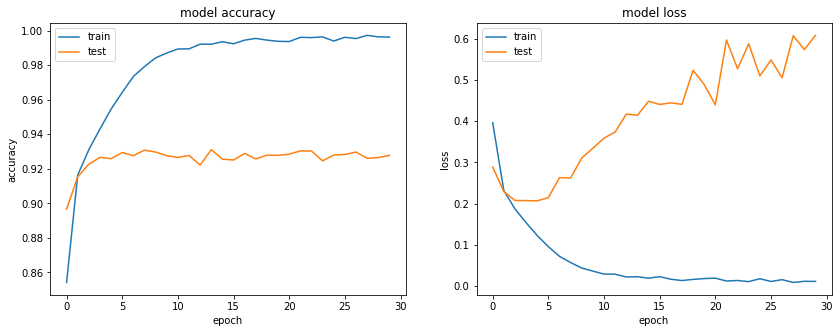

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.plot(history_cn3.history['accuracy'])
ax1.plot(history_cn3.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(history_cn3.history['loss'])
ax2.plot(history_cn3.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

Through adding padding to the convolutional layers of our model, we see a good improvement in the models score. We see that now we are able to obtain an accuracy score of 0.93 and above. Hence I will include padding into the model.

However we also see that the overfitting has increased significantly. Through adding padding to the model, the model overfits quite early and quite a lot (up to 99% close to 1.00). 

After observing that the models overfitting has sky rocketed as the training score of the model I have currently goes all the way up to 0.99 while the test score is only around 0.93. I have decided that it is about time to try and reduce the models overfitting while trying to maintain the best accuracy score I possibly can


#### Reducing Overfitting (Batch Normalization)
The first method that I thought of to reduce the overfitting was to introduce Batch Normalization into my current model. How I attempted to do it was have a Batch Normalization layer for each Convolutional layer before activation and as well as for the hidden layer in my model to apply its slight regularization effects. This is to also try to increase the speed of training in my model as well as its accuracy:

* Conv2D (32 filters) kernal 3x3 (padding: same) Batch Normalization (Activation Relu) 
* Conv2D (32 filters) kernal 3x3 (padding: same) Batch Normalization (Activation Relu) 
* MaxPooling2D (pool_size (2,2))

* Conv2D (64 filters) kernal 3x3 (padding: same) Batch Normalization (Activation Relu) 
* Conv2D (64 filters) kernal 3x3 (padding: same) Batch Normalization (Activation Relu) 
* MaxPooling2D (pool_size (2,2))

* Hidden layer (256 nodes) Batch Normalization (Activation Relu)


In [ ]:
cn_model4 = Sequential()
cn_model4.add(Conv2D(64, (3,3), input_shape=(28,28,1), padding='same'))
cn_model4.add(BatchNormalization())
cn_model4.add(Activation('relu'))
cn_model4.add(Conv2D(64, (3,3), padding='same'))
cn_model4.add(BatchNormalization())
cn_model4.add(Activation('relu'))
cn_model4.add(MaxPooling2D(pool_size=(2,2)))

cn_model4.add(Conv2D(128, (3,3), padding='same'))
cn_model4.add(BatchNormalization())
cn_model4.add(Activation('relu'))
cn_model4.add(Conv2D(128, (3,3), padding='same'))
cn_model4.add(BatchNormalization())
cn_model4.add(Activation('relu'))
cn_model4.add(MaxPooling2D(pool_size=(2,2)))

cn_model4.add(Flatten())
cn_model4.add(Dense(256))
cn_model4.add(BatchNormalization())
cn_model4.add(Activation('relu'))
cn_model4.add(Dense(10, activation='softmax'))
cn_model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cn4 = cn_model4.fit(X_train_cn, y_train, epochs=30, batch_size=100, validation_data=(X_test_cn, y_test))
scores = cn_model4.evaluate(X_test_cn,  y_test, verbose=0)
print(f"Minimum Error:", 100-max(history_cn4.history['val_accuracy'])*100)

Epoch 1/30
600/600 [==============================] - 23s 37ms/step - loss: 0.3049 - accuracy: 0.8909 - val_loss: 0.3004 - val_accuracy: 0.8878
Epoch 2/30
600/600 [==============================] - 21s 36ms/step - loss: 0.1954 - accuracy: 0.9278 - val_loss: 0.2445 - val_accuracy: 0.9073
Epoch 3/30
600/600 [==============================] - 22s 36ms/step - loss: 0.1554 - accuracy: 0.9428 - val_loss: 0.1953 - val_accuracy: 0.9302
Epoch 4/30
600/600 [==============================] - 22s 36ms/step - loss: 0.1190 - accuracy: 0.9564 - val_loss: 0.2047 - val_accuracy: 0.9293
Epoch 5/30
600/600 [==============================] - 22s 36ms/step - loss: 0.0915 - accuracy: 0.9669 - val_loss: 0.2167 - val_accuracy: 0.9267
Epoch 6/30
600/600 [==============================] - 22s 36ms/step - loss: 0.0655 - accuracy: 0.9773 - val_loss: 0.2550 - val_accuracy: 0.9223
Epoch 7/30
600/600 [==============================] - 22s 36ms/step - loss: 0.0489 - accuracy: 0.9829 - val_loss: 0.2454 - val_accuracy:

After application of Batch Normalization into my model, we do not see any deprovement nor improvement in the models performance as the model is still able to score up to its minimum 0.93 validation accuracy.  

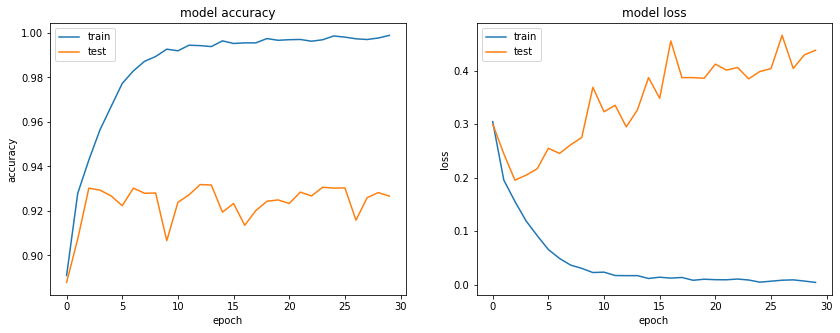

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.plot(history_cn4.history['accuracy'])
ax1.plot(history_cn4.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(history_cn4.history['loss'])
ax2.plot(history_cn4.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

From the epoch plots we observe that through the incorporation of Batch Normalization into the model, there is not much regularization effects as well as accuracy improvements happening on our model. The model is still overfitting a lot, hence we will need to find a better way to deal with this overfitting in our model. 
#### Reducing Overfitting (Dropout)
The next method that I have though of to reduce the over fitting of our model was through the use of Dropout layers for the model in order to dropout some input for some layers

To get a sense of how much overfitting reduction will happen by adding Dropout layers, I decided to try with just 1 layer of dropout first of rate 0.2

In [ ]:
cn_model = Sequential()
cn_model.add(Conv2D(64, (3,3), input_shape=(28,28,1), padding='same'))
cn_model.add(BatchNormalization())
cn_model.add(Activation('relu'))
cn_model.add(Conv2D(64, (3,3), padding='same'))
cn_model.add(BatchNormalization())
cn_model.add(Activation('relu'))
cn_model.add(MaxPooling2D(pool_size=(2,2)))

cn_model.add(Conv2D(128, (3,3), padding='same'))
cn_model.add(BatchNormalization())
cn_model.add(Activation('relu'))
cn_model.add(Conv2D(128, (3,3), padding='same'))
cn_model.add(BatchNormalization())
cn_model.add(Activation('relu'))
cn_model.add(MaxPooling2D(pool_size=(2,2)))

cn_model.add(Flatten())
cn_model.add(Dense(256))
cn_model.add(BatchNormalization())
cn_model.add(Activation('relu'))
cn_model.add(Dropout(0.2))

cn_model.add(Dense(10, activation='softmax'))
cn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cn = cn_model.fit(X_train_cn, y_train, epochs=30, batch_size=100, validation_data=(X_test_cn, y_test))
scores = cn_model.evaluate(X_test_cn,  y_test, verbose=0)
print(f"Minimum Error:", 100-max(history_cn.history['val_accuracy'])*100)

Epoch 1/30
600/600 [==============================] - 23s 37ms/step - loss: 0.3231 - accuracy: 0.8843 - val_loss: 0.2930 - val_accuracy: 0.8962
Epoch 2/30
600/600 [==============================] - 22s 37ms/step - loss: 0.2038 - accuracy: 0.9258 - val_loss: 0.2342 - val_accuracy: 0.9137
Epoch 3/30
600/600 [==============================] - 22s 36ms/step - loss: 0.1647 - accuracy: 0.9384 - val_loss: 0.2192 - val_accuracy: 0.9180
Epoch 4/30
600/600 [==============================] - 22s 37ms/step - loss: 0.1332 - accuracy: 0.9526 - val_loss: 0.2408 - val_accuracy: 0.9156
Epoch 5/30
600/600 [==============================] - 22s 36ms/step - loss: 0.1071 - accuracy: 0.9617 - val_loss: 0.2300 - val_accuracy: 0.9222
Epoch 6/30
600/600 [==============================] - 22s 36ms/step - loss: 0.0826 - accuracy: 0.9694 - val_loss: 0.3139 - val_accuracy: 0.8985
Epoch 7/30
600/600 [==============================] - 22s 36ms/step - loss: 0.0637 - accuracy: 0.9772 - val_loss: 0.2263 - val_accuracy:

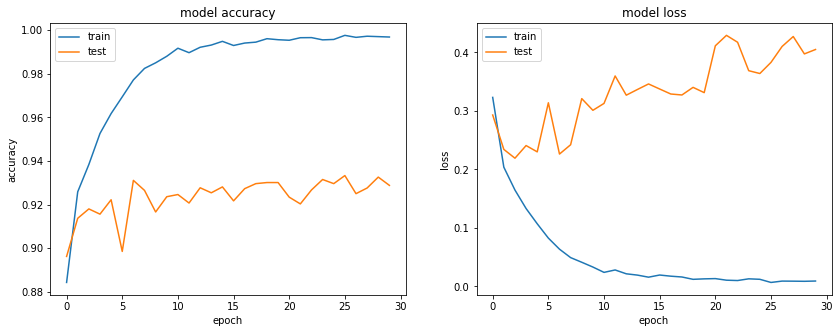

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.plot(history_cn.history['accuracy'])
ax1.plot(history_cn.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(history_cn.history['loss'])
ax2.plot(history_cn.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

Through just adding 1 layer of dropout after the hidden layer appears to not be enough as we see the model overfitting still quite a lot and extremely early. Hence I decided to try to add after all MaxPooling layers and after the hidden layer with a dropout rate of 0.2: 

* Conv2D (32 filters) kernal 3x3 (padding: same) Batch Normalization (Activation Relu) 
* Conv2D (32 filters) kernal 3x3 (padding: same) Batch Normalization (Activation Relu) 
* MaxPooling2D (pool_size (2,2))
* Dropout(0.2)

* Conv2D (64 filters) kernal 3x3 (padding: same) Batch Normalization (Activation Relu) 
* Conv2D (64 filters) kernal 3x3 (padding: same) Batch Normalization (Activation Relu) 
* MaxPooling2D (pool_size (2,2))
* Dropout(0.2)

* Hidden layer (256 nodes) Batch Normalization (Activation Relu)
* Dropout(0.2)


In [ ]:
cn_model5 = Sequential()
cn_model5.add(Conv2D(64, (3,3), input_shape=(28,28,1), padding='same'))
cn_model5.add(BatchNormalization())
cn_model5.add(Activation('relu'))
cn_model5.add(Conv2D(64, (3,3), padding='same'))
cn_model5.add(BatchNormalization())
cn_model5.add(Activation('relu'))
cn_model5.add(MaxPooling2D(pool_size=(2,2)))
cn_model5.add(Dropout(0.2))

cn_model5.add(Conv2D(128, (3,3), padding='same'))
cn_model5.add(BatchNormalization())
cn_model5.add(Activation('relu'))
cn_model5.add(Conv2D(128, (3,3), padding='same'))
cn_model5.add(BatchNormalization())
cn_model5.add(Activation('relu'))
cn_model5.add(MaxPooling2D(pool_size=(2,2)))
cn_model5.add(Dropout(0.2))

cn_model5.add(Flatten())
cn_model5.add(Dense(256))
cn_model5.add(BatchNormalization())
cn_model5.add(Activation('relu'))
cn_model5.add(Dropout(0.2))

cn_model5.add(Dense(10, activation='softmax'))
cn_model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cn5 = cn_model5.fit(X_train_cn, y_train, epochs=30, batch_size=100, validation_data=(X_test_cn, y_test))
scores = cn_model5.evaluate(X_test_cn,  y_test, verbose=0)
print(f"Minimum Error:", 100-max(history_cn5.history['val_accuracy'])*100)

Epoch 1/30
600/600 [==============================] - 24s 38ms/step - loss: 0.3534 - accuracy: 0.8717 - val_loss: 0.2987 - val_accuracy: 0.8888
Epoch 2/30
600/600 [==============================] - 22s 37ms/step - loss: 0.2356 - accuracy: 0.9132 - val_loss: 0.2237 - val_accuracy: 0.9168
Epoch 3/30
600/600 [==============================] - 22s 37ms/step - loss: 0.1987 - accuracy: 0.9275 - val_loss: 0.2093 - val_accuracy: 0.9245
Epoch 4/30
600/600 [==============================] - 22s 37ms/step - loss: 0.1748 - accuracy: 0.9359 - val_loss: 0.2001 - val_accuracy: 0.9285
Epoch 5/30
600/600 [==============================] - 22s 37ms/step - loss: 0.1533 - accuracy: 0.9444 - val_loss: 0.1971 - val_accuracy: 0.9287
Epoch 6/30
600/600 [==============================] - 22s 37ms/step - loss: 0.1417 - accuracy: 0.9469 - val_loss: 0.1958 - val_accuracy: 0.9327
Epoch 7/30
600/600 [==============================] - 22s 37ms/step - loss: 0.1224 - accuracy: 0.9536 - val_loss: 0.2014 - val_accuracy:

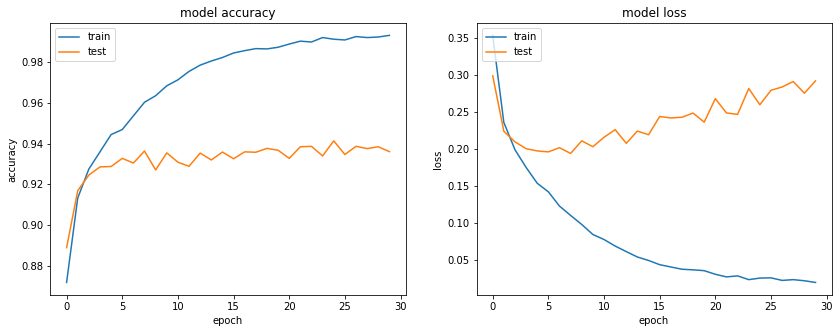

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.plot(history_cn5.history['accuracy'])
ax1.plot(history_cn5.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(history_cn5.history['loss'])
ax2.plot(history_cn5.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

After including even more dropout layers for our CNN, we see that overfitting still occurs. However we notice that we did manage to reduce the overfitting slightly such that it happens slightly slower. We see that the gap is smaller at earlier stages of training the model as compared to the previous model with only 1 dropout layer. 

Another thing we notice is that we are now able to obtain 0.93 and above accuracy scores more consistently. Previously there were quite a lot more fluctuations from 0.92 to 0.93 in our previous model. 

Next I decided to try tuning the dropout rates to see if we can further reduce this overfitting gap while still maintain the current model's accuracy. I tried dropout rates from 0.2 to 0.5 

In [ ]:
models = []
drop_outs = [0.2,0.3 ,0.4, 0.5]
for i in drop_outs:
  cn_model = Sequential()
  cn_model.add(Conv2D(64, (3,3), input_shape=(28,28,1), padding='same'))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation('relu'))
  cn_model.add(Conv2D(64, (3,3), padding='same'))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation('relu'))
  cn_model.add(MaxPooling2D(pool_size=(2,2)))
  cn_model.add(Dropout(i))

  cn_model.add(Conv2D(128, (3,3), padding='same'))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation('relu'))
  cn_model.add(Conv2D(128, (3,3), padding='same'))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation('relu'))
  cn_model.add(MaxPooling2D(pool_size=(2,2)))
  cn_model.add(Dropout(i))

  cn_model.add(Flatten())
  cn_model.add(Dense(256))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation('relu'))
  cn_model.add(Dropout(i))

  cn_model.add(Dense(10, activation='softmax'))
  cn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history_cn = cn_model.fit(X_train_cn, y_train, epochs=30, batch_size=100, validation_data=(X_test_cn, y_test), verbose=0)
  models.append(history_cn)
  print("Minimum error: ", 100-max(history_cn.history['val_accuracy'])*100)

Minimum error:  5.93000054359436
Minimum error:  5.549997091293335
Minimum error:  5.549997091293335
Minimum error:  5.519998073577881


Through observation of the results of the different dropout rates and val accuracies, we see that the models accuracy remains around the same accuracy as the model dropout rates increases hence it should be ok for us to increase the dropout rate of the model without having to worry about affecting the model's performance.

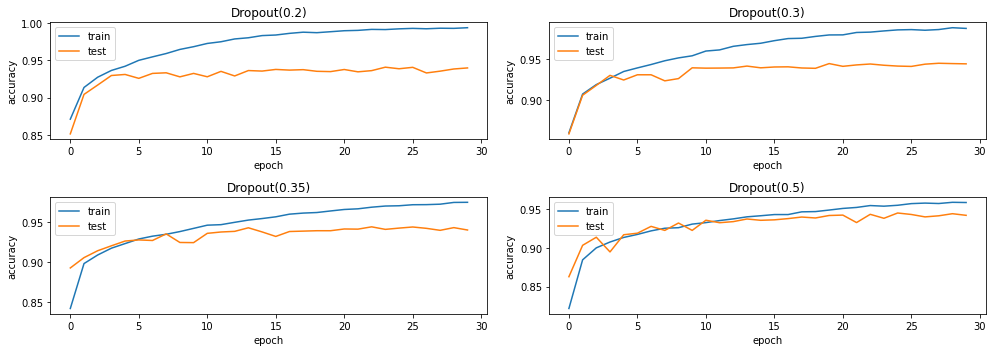

In [ ]:
fig, ((ax1, ax2) ,(ax3,ax4)) = plt.subplots(2,2, figsize=(14,5))
ax1.plot(models[0].history['accuracy'])
ax1.plot(models[0].history['val_accuracy'])
ax1.set_title('Dropout(0.2)')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

ax2.plot(models[1].history['accuracy'])
ax2.plot(models[1].history['val_accuracy'])
ax2.set_title('Dropout(0.3)')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')

ax3.plot(models[2].history['accuracy'])
ax3.plot(models[2].history['val_accuracy'])
ax3.set_title('Dropout(0.4)')
ax3.set_ylabel('accuracy')
ax3.set_xlabel('epoch')
ax3.legend(['train', 'test'], loc='upper left')

ax4.plot(models[3].history['accuracy'])
ax4.plot(models[3].history['val_accuracy'])
ax4.set_title('Dropout(0.5)')
ax4.set_ylabel('accuracy')
ax4.set_xlabel('epoch')
ax4.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

 If we look at the epoch plots for each of the dropout rates, we see that as we increase the dropout rate, it reduces the overfitting even further and the dropout rate of 0.5 reduces the overfitting to the least. 

Since the overfitting reduces when increasing the dropout rate but still maintains similar val accuracy, I decided to convert all the dropout rates in my model to be 0.5

#### Learning rate and Optimizer Adjustment
One of the hyperparameters that we should try to hypertune would be the learning rate of our model. It controls how big the jumps your model makes, and from there, how quickly it learn.

* A smaller learning rate means more reliable training, but longer time 
* A high learning rate, may not converge or even diverge, weight changes can be so big that the optimizer overshoots the minimum and makes the loss worse. Thus we need to find the optimal learning rate which can quickly find the minimum loss.

Here I adjusted the learning rate of the different optimizers to see if we can increase the efficienecy or accuracy of the model training. Why I did both learning rate and optimizer was due to optimizers performing differently on different learning rates. The opimizers chosen are:
* Adam
* RMSprop
* Stochastic Gradient Decsent (SGD)

and the learning rates I experimented with are 0.0001, 0.001, 0.01 and 0.1

In [ ]:
learning_rates = [
                  Adam(0.0001), Adam(0.001), Adam(0.01), Adam(0.1),
                  SGD(0.0001), SGD(0.001), SGD(0.01), SGD(0.1),
                  RMSprop(0.0001), RMSprop(0.001), RMSprop(0.01), RMSprop(0.1)
                  ]
learning_rates_str = [
                  'Adam(0.0001)', 'Adam(0.001)', 'Adam(0.01)', 'Adam(0.1)',
                  'SGD(0.0001)', 'SGD(0.001)', 'SGD(0.01)', 'SGD(0.1)',
                  'RMSprop(0.0001)', 'RMSprop(0.001)', 'RMSprop(0.01)', 'RMSprop(0.1)'
                  ]
learning_rate_df = pd.DataFrame({'Learning_rate': [], 'Minimum Error': []})
for i in range(len(learning_rates)): 
  cn_model = Sequential()
  cn_model.add(Conv2D(64, (3,3), input_shape=(28,28,1), padding='same'))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation('relu'))
  cn_model.add(Conv2D(64, (3,3), padding='same'))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation('relu'))
  cn_model.add(MaxPooling2D(pool_size=(2,2)))
  cn_model.add(Dropout(0.5))

  cn_model.add(Conv2D(128, (3,3), padding='same'))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation('relu'))
  cn_model.add(Conv2D(128, (3,3), padding='same'))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation('relu'))
  cn_model.add(MaxPooling2D(pool_size=(2,2)))
  cn_model.add(Dropout(0.5))

  cn_model.add(Flatten())
  cn_model.add(Dense(256))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation('relu'))
  cn_model.add(Dropout(0.5))

  cn_model.add(Dense(10, activation='softmax'))
  cn_model.compile(loss='categorical_crossentropy', optimizer=learning_rates[i], metrics=['accuracy'])
  history_cn = cn_model.fit(X_train_cn, y_train, epochs=30, batch_size=100, validation_data=(X_test_cn, y_test),verbose=0)
  row_df = pd.DataFrame({'Learning_rate': [learninig_rates_str[i]], 'Minimum Error': [100-max(history_cn.history['val_accuracy'])*100]})
  print(f'{i}')
  learning_rate_df = learning_rate_df.append(row_df)
learning_rate_df


,Learning_rate,Minimum Error
0,<keras.optimizer_v2.adam.Adam object at 0x7fde...,6.400001
0,<keras.optimizer_v2.adam.Adam object at 0x7fde...,5.530000
0,<keras.optimizer_v2.adam.Adam object at 0x7fde...,5.960000
0,<keras.optimizer_v2.adam.Adam object at 0x7fde...,8.560002
0,<keras.optimizer_v2.gradient_descent.SGD objec...,24.199998
0,<keras.optimizer_v2.gradient_descent.SGD objec...,15.329999
0,<keras.optimizer_v2.gradient_descent.SGD objec...,8.840001
0,<keras.optimizer_v2.gradient_descent.SGD objec...,6.160003
0,<keras.optimizer_v2.rmsprop.RMSprop object at ...,6.919998
0,<keras.optimizer_v2.rmsprop.RMSprop object at ...,6.389999


Through the comparison of multiple different optimizers and learning rates, we see that generally the optimizer with better performance is the optimizer my model currently uses (Adam). We also see that the learning rate of 0.001 performed the best out of all the adam optimizers with different learning rates, which is the default Adam learning rate. 

Hence I will keep my models optimizer to be adam and learning rate at 0.001


#### Activation Function Adjustment
Next would be trying to improve the model by using different types of activation functions. The functions that I have chosen to tryout are the 'sigmoid', 'tanh', 'relu' and 'leaky_relu'

In [ ]:
activation = ['sigmoid', 'tanh', 'relu', 'leaky_relu']
activation_df = pd.DataFrame({'Activation': [], 'Minimum Error': []})
for i in activation:
  cn_model = Sequential()
  cn_model.add(Conv2D(64, (3,3), input_shape=(28,28,1), padding='same'))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation(i))
  cn_model.add(Conv2D(64, (3,3), padding='same'))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation(i))
  cn_model.add(MaxPooling2D(pool_size=(2,2)))
  cn_model.add(Dropout(0.5))

  cn_model.add(Conv2D(128, (3,3), padding='same'))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation(i))
  cn_model.add(Conv2D(128, (3,3), padding='same'))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation(i))
  cn_model.add(MaxPooling2D(pool_size=(2,2)))
  cn_model.add(Dropout(0.5))

  cn_model.add(Flatten())
  cn_model.add(Dense(256))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation(i))
  cn_model.add(Dropout(0.5))

  cn_model.add(Dense(10, activation='softmax'))
  cn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history_cn = cn_model.fit(X_train_cn, y_train, epochs=30, batch_size=100, validation_data=(X_test_cn, y_test), verbose=0)
  scores = cn_model.evaluate(X_test_cn,  y_test, verbose=0)
  row_df = pd.DataFrame({'Activation': [i], 'Minimum Error': [100-max(history_cn.history['val_accuracy'])*100]})
  print(i, "Done")
  activation_df = activation_df.append(row_df)

activation_df

sigmoid Done
tanh Done
relu Done
leaky_relu Done


,Activation,Minimum Error
0,sigmoid,6.730002
0,tanh,6.209999
0,relu,5.629998
0,leaky_relu,5.750000


From the results above, we see the activation function that was able to obtain the best score is the Relu function which my model currently uses 

#### Batchsize Adjustment

Here I tried to tune the model based on its batch size for training.

In [ ]:
batch_size = [50, 100, 150, 200, 300]
batch_df = pd.DataFrame({'Batch Size': [], 'Minimum Error': []})
for i in batch_size:
  print(i)
  cn_model = Sequential()
  cn_model.add(Conv2D(64, (3,3), input_shape=(28,28,1), padding='same'))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation('relu'))
  cn_model.add(Conv2D(64, (3,3), padding='same'))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation('relu'))
  cn_model.add(MaxPooling2D(pool_size=(2,2)))
  cn_model.add(Dropout(0.5))

  cn_model.add(Conv2D(128, (3,3), padding='same'))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation('relu'))
  cn_model.add(Conv2D(128, (3,3), padding='same'))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation('relu'))
  cn_model.add(MaxPooling2D(pool_size=(2,2)))
  cn_model.add(Dropout(0.5))

  cn_model.add(Flatten())
  cn_model.add(Dense(256))
  cn_model.add(BatchNormalization())
  cn_model.add(Activation('relu'))
  cn_model.add(Dropout(0.5))

  cn_model.add(Dense(10, activation='softmax'))x1
  cn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history_cn = cn_model.fit(X_train_cn, y_train, epochs=30, batch_size=i, validation_data=(X_test_cn, y_test), verbose=0)
  scores = cn_model.evaluate(X_test_cn,  y_test, verbose=0)
  row_df = pd.DataFrame({'Batch Size': [i], 'Minimum Error': [100-max(history_cn.history['val_accuracy'])*100]})
  print(i, "Done")
  batch_df = batch_df.append(row_df)

batch_df

50
50 Done
100
100 Done
150
150 Done
200
200 Done
300
300 Done


,Batch Size,Minimum Error
0,50.0,5.659997
0,100.0,5.559999
0,150.0,5.559999
0,200.0,5.610001
0,300.0,5.830002


Through the results, we see that changing the batch sizes did not have too much effect on the model’s validation accuracy. Hence, I have decided to increase my model’s batch size to 150 


#### Convolutional Neural Network with Data Augmentation
Here I attempted to obtain a more accurate model through the usage of data augmentation to create more data to train my model with. This was meant to try an increase the validation accuracy of the model as well as reduce the models overfitting even further. 

The image transformations that I have done for the model was 
- Zoom image
- Shift image horizontally and vertically

Then I trained my current model with this newly engineered data. Initially when introduced more data into the model and fitted it with my current model of dropout 0.5, I found that the model took a huge amount of epochs to train and obtain its best score (Around 75 epochs). 

So instead of using the 0.5 dropout rate, I had to adjust the dropout rate so that I can reduce the overfitting to the absolute minimum but still obtain the highest accuracy score that I can get.

I had found through constant experimentation on dropout rates that the best combination of dropout rates for my model is:
- Max Pooling (2,2)
- Dropout(0.25)
- Max Pooling (2,2)
- Dropout(0.25)
- Dene(256)
- Dropout(0.5)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
    
datagen.fit(X_train_cn)

In [ ]:
cn_model = Sequential()
cn_model.add(Conv2D(64, (3,3), input_shape=(28,28,1), padding='same'))
cn_model.add(BatchNormalization())
cn_model.add(Activation('relu'))
cn_model.add(Conv2D(64, (3,3), padding='same'))
cn_model.add(BatchNormalization())
cn_model.add(Activation('relu'))
cn_model.add(MaxPooling2D(pool_size=(2,2)))
cn_model.add(Dropout(0.25))

cn_model.add(Conv2D(128, (3,3), padding='same'))
cn_model.add(BatchNormalization())
cn_model.add(Activation('relu'))
cn_model.add(Conv2D(128, (3,3), padding='same'))
cn_model.add(BatchNormalization())
cn_model.add(Activation('relu'))
cn_model.add(MaxPooling2D(pool_size=(2,2)))
cn_model.add(Dropout(0.25))

cn_model.add(Flatten())
cn_model.add(Dense(256))
cn_model.add(BatchNormalization())
cn_model.add(Activation('relu'))
cn_model.add(Dropout(0.5))

cn_model.add(Dense(10, activation='softmax'))
cn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cn = cn_model.fit(datagen.flow(X_train_cn, y_train, batch_size=150), epochs=50, validation_data=(X_test_cn, y_test))
scores = cn_model.evaluate(X_test_cn,  y_test, verbose=0)
print(f"Minimum Error:", 100-max(history_cn.history['val_accuracy'])*100)

Epoch 1/50
400/400 [==============================] - 33s 79ms/step - loss: 0.5811 - accuracy: 0.7851 - val_loss: 1.5924 - val_accuracy: 0.5329
Epoch 2/50
400/400 [==============================] - 31s 78ms/step - loss: 0.4039 - accuracy: 0.8506 - val_loss: 0.3279 - val_accuracy: 0.8776
Epoch 3/50
400/400 [==============================] - 31s 78ms/step - loss: 0.3533 - accuracy: 0.8687 - val_loss: 0.2647 - val_accuracy: 0.9008
Epoch 4/50
400/400 [==============================] - 31s 77ms/step - loss: 0.3261 - accuracy: 0.8812 - val_loss: 0.3043 - val_accuracy: 0.8822
Epoch 5/50
400/400 [==============================] - 31s 79ms/step - loss: 0.3016 - accuracy: 0.8899 - val_loss: 0.2779 - val_accuracy: 0.8970
Epoch 6/50
400/400 [==============================] - 32s 79ms/step - loss: 0.2920 - accuracy: 0.8918 - val_loss: 0.2860 - val_accuracy: 0.8952
Epoch 7/50
400/400 [==============================] - 31s 78ms/step - loss: 0.2808 - accuracy: 0.8967 - val_loss: 0.2269 - val_accuracy:

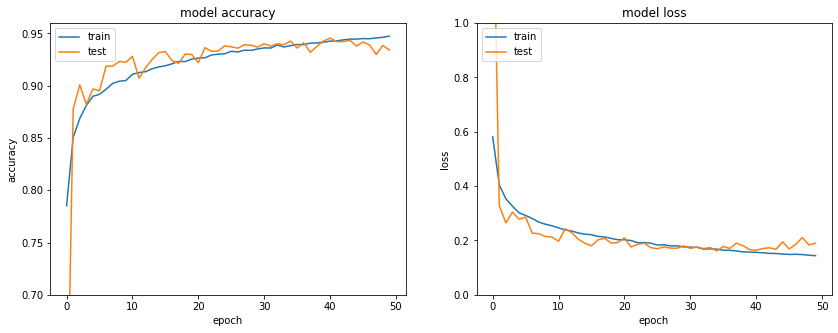

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.plot(history_cn.history['accuracy'])
ax1.plot(history_cn.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(history_cn.history['loss'])
ax2.plot(history_cn.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
ax1.set_ylim(0.7, 0.96)
ax2.set_ylim(0, 1)
plt.show()

Through feeding our model with auugmented image data we obsereved some changes in the models training and testing performnce
- First we see no improvement in the validation accuracy of the model. This may be due to the all of the images of the objects being centered around the same area in the picture as well as appearing in almost the same state as each other. Hence making image augmentation have no significant effect in improving the models accuracy. 
- Another thing we notice is that the model now fluctuates quite a bit, but the score is generally still similar hence it is ok
- However we do see that the model now does not overfit like it did previously without image augmentation
- Since now we are able to score 0.94 without the model overfitting, I decided to incorporate data augmentation into my model and use this model as my final model after epoch adjustment

#### Epoch Adjustment
Now we will need to adjust the epochs so that we can stop our model at the most approriate point of our model. Why I have chosen to do epoch adjustment instead of early stopping was because of how my model performs. Due to data augmentation, it reduced the overfitting a lot but caused my model to fluctuate. After trying early stopping a few times, I found that it keeps stopping my model when the accuracy is still not at its fullest due to the fluctuations. Hence I felt that it is best that I stop my model myself through model epoch graph observations so that I can manually stop my model in the epochs where the validation accuracy is more stable with the least overfitting

In [ ]:
cn_model6 = Sequential()
cn_model6.add(Conv2D(64, (3,3), input_shape=(28,28,1), padding='same'))
cn_model6.add(BatchNormalization())
cn_model6.add(Activation('relu'))
cn_model6.add(Conv2D(64, (3,3), padding='same'))
cn_model6.add(BatchNormalization())
cn_model6.add(Activation('relu'))
cn_model6.add(MaxPooling2D(pool_size=(2,2)))
cn_model6.add(Dropout(0.25))

cn_model6.add(Conv2D(128, (3,3), padding='same'))
cn_model6.add(BatchNormalization())
cn_model6.add(Activation('relu'))
cn_model6.add(Conv2D(128, (3,3), padding='same'))
cn_model6.add(BatchNormalization())
cn_model6.add(Activation('relu'))
cn_model6.add(MaxPooling2D(pool_size=(2,2)))
cn_model6.add(Dropout(0.25))

cn_model6.add(Flatten())
cn_model6.add(Dense(256))
cn_model6.add(BatchNormalization())
cn_model6.add(Activation('relu'))
cn_model6.add(Dropout(0.5))

cn_model6.add(Dense(10, activation='softmax'))
cn_model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_cn6 = cn_model6.fit(datagen.flow(X_train_cn, y_train, batch_size=150), epochs=60, validation_data=(X_test_cn, y_test))
scores = cn_model6.evaluate(X_test_cn,  y_test, verbose=0)
print(f"Minimum Error:", 100-max(history_cn6.history['val_accuracy'])*100)

Epoch 1/60
400/400 [==============================] - 32s 76ms/step - loss: 0.5894 - accuracy: 0.7818 - val_loss: 1.3216 - val_accuracy: 0.5721
Epoch 2/60
400/400 [==============================] - 29s 73ms/step - loss: 0.4029 - accuracy: 0.8505 - val_loss: 0.2809 - val_accuracy: 0.8948
Epoch 3/60
400/400 [==============================] - 29s 73ms/step - loss: 0.3562 - accuracy: 0.8675 - val_loss: 0.2744 - val_accuracy: 0.8988
Epoch 4/60
400/400 [==============================] - 29s 73ms/step - loss: 0.3270 - accuracy: 0.8802 - val_loss: 0.2937 - val_accuracy: 0.8883
Epoch 5/60
400/400 [==============================] - 30s 75ms/step - loss: 0.3043 - accuracy: 0.8888 - val_loss: 0.2528 - val_accuracy: 0.9040
Epoch 6/60
400/400 [==============================] - 29s 74ms/step - loss: 0.2899 - accuracy: 0.8934 - val_loss: 0.2358 - val_accuracy: 0.9137
Epoch 7/60
400/400 [==============================] - 29s 73ms/step - loss: 0.2801 - accuracy: 0.8953 - val_loss: 0.2732 - val_accuracy:

If we take a look at the models performance for validation accuracy, we see that it is around 43 epoch where the model starts to stabalize in term of validation accuracy and is able to score around 0.94% accuracy.

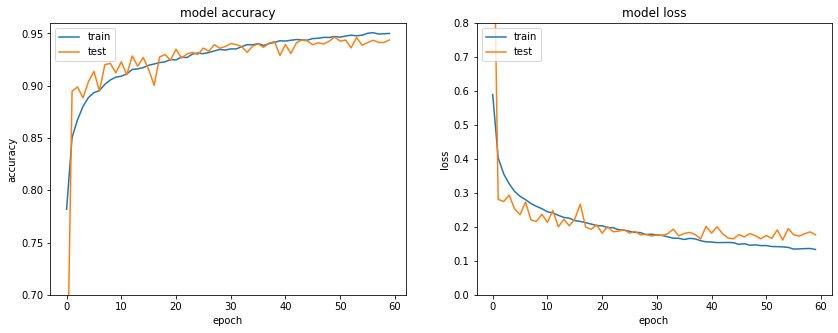

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.plot(history_cn6.history['accuracy'])
ax1.plot(history_cn6.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(history_cn6.history['loss'])
ax2.plot(history_cn6.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
ax1.set_ylim(0.7, 0.96)
ax2.set_ylim(0, 0.8)
plt.show()

Looking at the epoch plot, we see that even though there is quite a lot of small fluctuations, there is a general increase in the models accuracy as  the model progresses up till around 43 epoch. Hence I have decided that the most appropriate epoch to stop training my model would be around 43 ~ 44 epochs even though the train score may be extremely slightly higher than the test score(<1%)

### Final Model
Now that my hypertunning is done, here is my final model for the Fashion MNIST dataset image classification and its statistics as well as architecture

Architecture:
* Conv2D (32 filters) kernal 3x3 (padding: same) Batch Normalization (Activation Relu) 
* Conv2D (32 filters) kernal 3x3 (padding: same) Batch Normalization (Activation Relu) 
* MaxPooling2D (pool_size (2,2))
* Dropout(0.25)

* Conv2D (64 filters) kernal 3x3 (padding: same) Batch Normalization (Activation Relu) 
* Conv2D (64 filters) kernal 3x3 (padding: same) Batch Normalization (Activation Relu) 
* MaxPooling2D (pool_size (2,2))
* Dropout(0.25)

* Hidden layer (256 nodes) Batch Normalization (Activation Relu)
* Dropout(0.5)

* Optimizer: Adam(0.001), Batch Size: 150, Activation functions: ReLu, Epoch: 43

Performance: train accuracy = , test accuracy = 0.936 ~ 0.94

In [ ]:
final_model = Sequential()
final_model.add(Conv2D(64, (3,3), input_shape=(28,28,1), padding='same'))
final_model.add(BatchNormalization())
final_model.add(Activation('relu'))
final_model.add(Conv2D(64, (3,3), padding='same'))
final_model.add(BatchNormalization())
final_model.add(Activation('relu'))
final_model.add(MaxPooling2D(pool_size=(2,2)))
final_model.add(Dropout(0.25))

final_model.add(Conv2D(128, (3,3), padding='same'))
final_model.add(BatchNormalization())
final_model.add(Activation('relu'))
final_model.add(Conv2D(128, (3,3), padding='same'))
final_model.add(BatchNormalization())
final_model.add(Activation('relu'))
final_model.add(MaxPooling2D(pool_size=(2,2)))
final_model.add(Dropout(0.25))

final_model.add(Flatten())
final_model.add(Dense(256))
final_model.add(BatchNormalization())
final_model.add(Activation('relu'))
final_model.add(Dropout(0.5))

final_model.add(Dense(10, activation='softmax'))
final_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
final_history = final_model.fit(datagen.flow(X_train_cn, y_train), epochs=43, batch_size=150, validation_data=(X_test_cn, y_test))
scores = final_model.evaluate(X_test_cn,  y_test, verbose=0)
print(f"CNN_model Score:", (scores[0], scores[1]))

Epoch 1/43
1875/1875 [==============================] - 44s 23ms/step - loss: 0.5766 - accuracy: 0.7861 - val_loss: 0.3345 - val_accuracy: 0.8753
Epoch 2/43
1875/1875 [==============================] - 42s 22ms/step - loss: 0.4066 - accuracy: 0.8498 - val_loss: 0.3302 - val_accuracy: 0.8800
Epoch 3/43
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3579 - accuracy: 0.8693 - val_loss: 0.2636 - val_accuracy: 0.9030
Epoch 4/43
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3316 - accuracy: 0.8789 - val_loss: 0.2623 - val_accuracy: 0.9048
Epoch 5/43
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3112 - accuracy: 0.8867 - val_loss: 0.2534 - val_accuracy: 0.9073
Epoch 6/43
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2996 - accuracy: 0.8907 - val_loss: 0.3002 - val_accuracy: 0.8880
Epoch 7/43
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2832 - accuracy: 0.8963 - val_loss: 0.2109 -

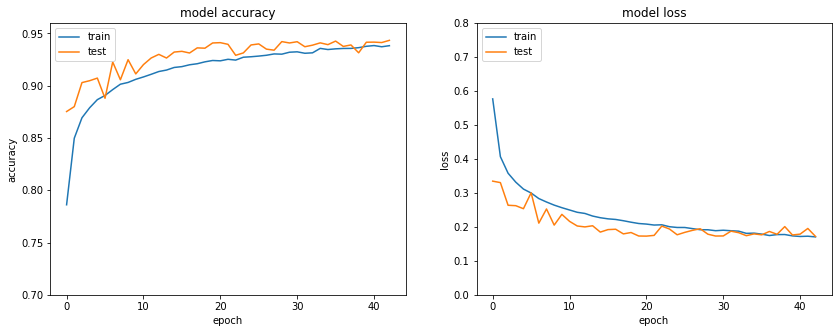

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.plot(final_history.history['accuracy'])
ax1.plot(final_history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax2.plot(final_history.history['loss'])
ax2.plot(final_history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'test'], loc='upper left')
ax1.set_ylim(0.7, 0.96)
ax2.set_ylim(0, 0.8)
plt.show()

In [ ]:
final_model.save('models/hypertuned_augment_model')

INFO:tensorflow:Assets written to: models/hypertuned_augment_model/assets


### Model evaluation
Now its time for model evaluation, where we compare the final model with the basline model to see how it performs in comparison as well as to see the current errors that the final model makes

#### Basic vs Baseline vs Hypertuned CNN
Here we take a look at the heat maps of each models confusion matrix to compare their performance in predicting different classes as well as look at the model improvements or even deprovements. This is to also get an idea on the effects of the model complexity as well as hyperparameters and how they changed the model's predictions.

Here I have the Basic NN, Baseline CNN and the Final Tuned CNN

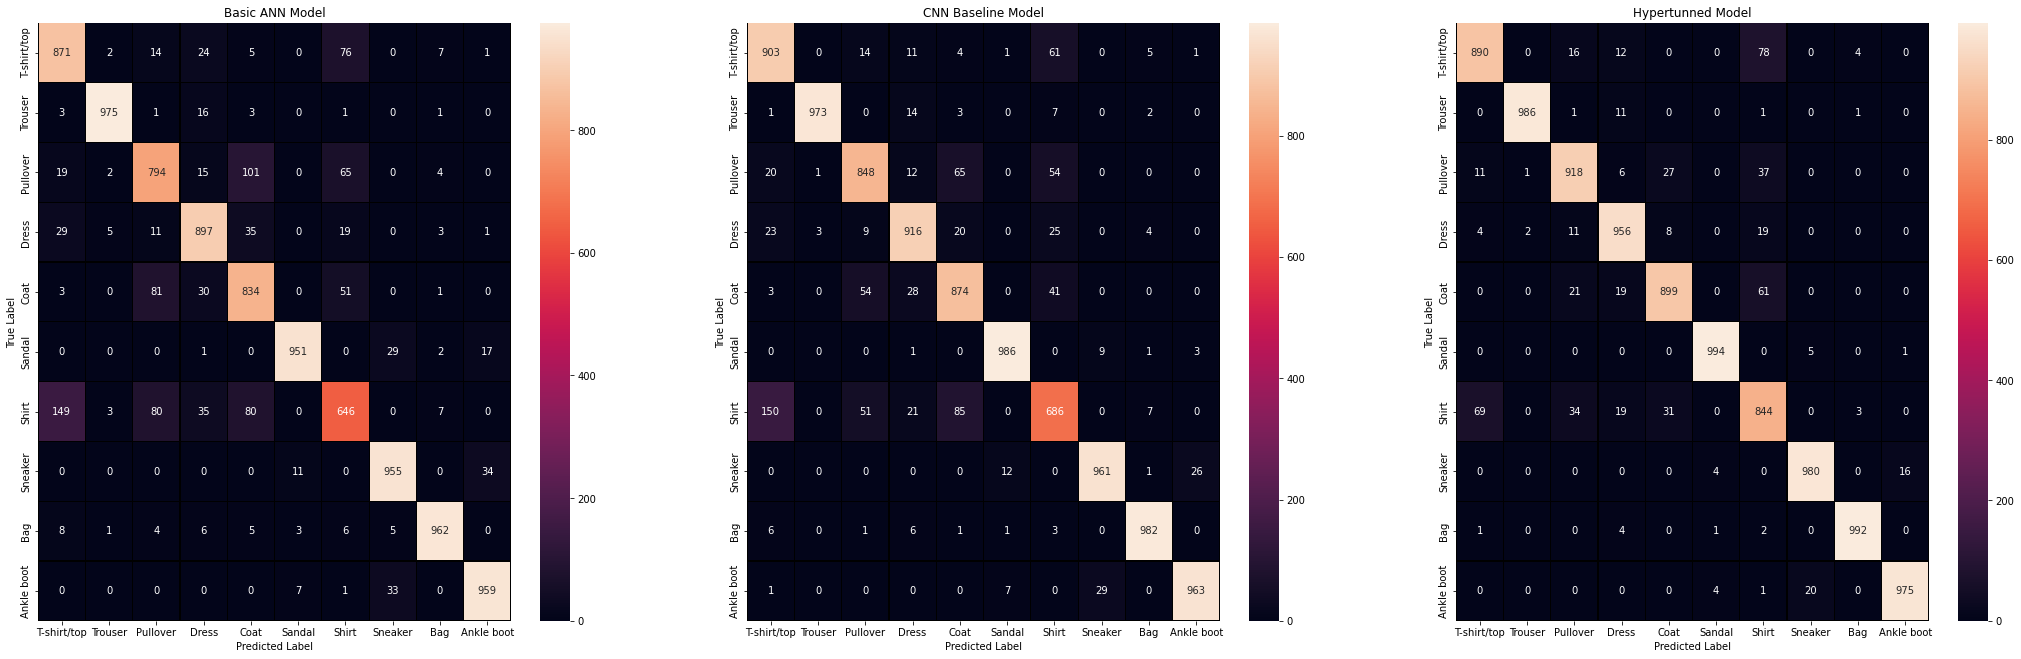

In [ ]:
basic_model = load_model('models/basic_model')
baseline_model = load_model('models/cnn_model')
final_model = load_model('models/hypertuned_augment_model')

y_true = np.argmax(y_test, axis=1 )

basic_pred = basic_model.predict(X_test_bm)
basic_pred_classes = np.argmax(basic_pred, axis= 1)
basic_cm = confusion_matrix(y_true, basic_pred_classes)

cnn_pred = baseline_model.predict(X_test_cn)
baseline_pred_classes = np.argmax(cnn_pred, axis= 1)
baseline_cm = confusion_matrix(y_true, baseline_pred_classes)

final_pred = final_model.predict(X_test_cn)
final_pred_classes = np.argmax(final_pred, axis= 1)
final_cm = confusion_matrix(y_true, final_pred_classes)

f,(ax1,ax2, ax3) = plt.subplots(1,3,figsize = (36,11))
basic_cm_df = pd.DataFrame(basic_cm, columns= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'], index= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
baseline_cm_df = pd.DataFrame(baseline_cm, columns= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'], index= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])
final_cm_df = pd.DataFrame(final_cm, columns= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'], index= ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'])

sns.heatmap(basic_cm_df, annot=True, linewidths=0.1, linecolor="black", fmt='.0f', ax=ax1)
sns.heatmap(baseline_cm_df, annot=True, linewidths=0.1, linecolor="black", fmt='.0f', ax=ax2)
sns.heatmap(final_cm_df, annot=True, linewidths=0.1, linecolor="black", fmt='.0f', ax=ax3)

ax1.set_xlabel("Predicted Label")
ax1.set_ylabel("True Label")
ax1.set_title("Basic ANN Model")

ax2.set_xlabel("Predicted Label")
ax2.set_ylabel("True Label")
ax2.set_title("CNN Baseline Model")

ax3.set_xlabel("Predicted Label")
ax3.set_ylabel("True Label")
ax3.set_title("Hypertunned Model")
plt.show()

Here we compare the performance and see how it as changed/evolved over the many different processes done to the model

Basic (88%) --> CNN baseline (91%)
- Initially in the basic neural network, we see that most of the errors made was from classifying shirts as it kept being confused with other attire especially - T-shirt/tops likely due to similar appearances in the objects. Through creating a simple baseline CNN model, we did not see any improvements in this problem. Shirts category was still performin quite poorly 

- Through including convolution into the model, we see improvements or no changes in predicting almost all categories except Trousers. 

- Some improvement in predicting classes of clothing that belong to the general tops class (T-shirt/top, Pull over, Coat, Shirt, Dress) 

CNN baseline (91%) --> Hypertunned CNN (94%)
- Through hypertunning and increasing of model complexity, we see a 3% increase in terms of model accuracy as well as lesser overfitting.

- With the heat map we see that a lot of the accuracy gain was due to the significant improvement in Shirts. A lot lesser shirts were mistaken for other top categories. 

- We see overall improvement in most of the categories but there are some slight deprovements in T-shirt/top as well as Trousers 

- We also see that we have managed to almost score perfecty in classifying certain items such as the bag category and sandals category. 
- in this model, the worst class for classification was still Shirt but it was still good improvement as compared to the baseline model and basic NN model 
 

#### Incorrect Predictions
Here we take a look at some of the incorrect predictions and their actual labels, this can allow us to gain understanding on maybe why these images have been predicted incorrectly as well as maybe think of new ideas to improve the model's prediction accuracy

In [ ]:
pred_y = final_model.predict(X_test_cn)
class_y = np.argmax(pred_y, axis= 1)
class_y

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
pred_df = pd.DataFrame(class_y, columns=['Predicted Class'])
actual_df = pd.DataFrame(y_test_data, columns = ['Actual Class'])
results_df = pd.concat([pred_df, actual_df], axis=1)
incorrect_df = results_df[results_df['Predicted Class'] != results_df['Actual Class']]
incorrect_df.replace({0:'T-shirt/top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
incorrect_df.head(20)

,Predicted Class,Actual Class
4,T-shirt/top,Shirt
17,Shirt,Coat
25,Pullover,Coat
27,Shirt,T-shirt/top
32,Trouser,Dress
42,Shirt,Dress
49,Shirt,Pullover
68,Sneaker,Ankle boot
98,Pullover,Coat
107,Sneaker,Ankle boot


In [ ]:
print("Number of incorrect predictions: ",  len(incorrect_df.index), 'images')
print("Percentage of incorrect predictions: ",  len(incorrect_df.index)/10000*100, '%')

Number of incorrect predictions:  566 images
Percentage of incorrect predictions:  5.66 %


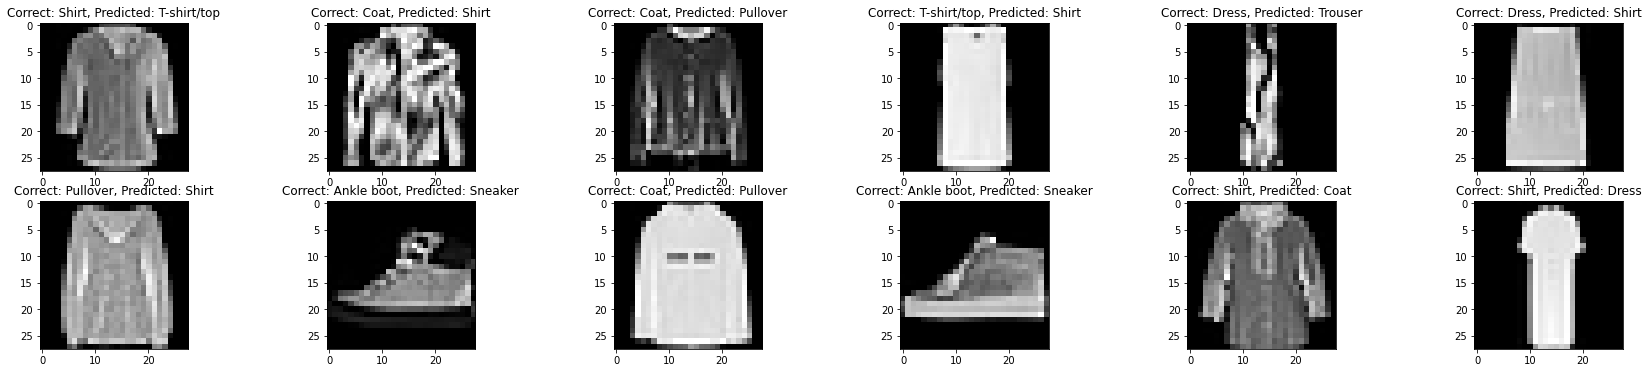

In [ ]:
#Data images
fig, ((ax1,ax2,ax3,ax4,ax5,ax6),(ax7,ax8,ax9,ax10,ax11,ax12)) = plt.subplots(2,6, figsize=(30,6))
ax1.imshow(X_test[4], cmap=plt.get_cmap('gray'))
ax1.set_title(f"Correct: {incorrect_df.iloc[0]['Actual Class']}, Predicted: {incorrect_df.iloc[0]['Predicted Class']}")

ax2.imshow(X_test[17], cmap=plt.get_cmap('gray'))
ax2.set_title(f"Correct: {incorrect_df.iloc[1]['Actual Class']}, Predicted: {incorrect_df.iloc[1]['Predicted Class']}")

ax3.imshow(X_test[25], cmap=plt.get_cmap('gray'))
ax3.set_title(f"Correct: {incorrect_df.iloc[2]['Actual Class']}, Predicted: {incorrect_df.iloc[2]['Predicted Class']}")

ax4.imshow(X_test[27], cmap=plt.get_cmap('gray'))
ax4.set_title(f"Correct: {incorrect_df.iloc[3]['Actual Class']}, Predicted: {incorrect_df.iloc[3]['Predicted Class']}")

ax5.imshow(X_test[32], cmap=plt.get_cmap('gray'))
ax5.set_title(f"Correct: {incorrect_df.iloc[4]['Actual Class']}, Predicted: {incorrect_df.iloc[4]['Predicted Class']}")

ax6.imshow(X_test[42], cmap=plt.get_cmap('gray'))
ax6.set_title(f"Correct: {incorrect_df.iloc[5]['Actual Class']}, Predicted: {incorrect_df.iloc[5]['Predicted Class']}")

ax7.imshow(X_test[49], cmap=plt.get_cmap('gray'))
ax7.set_title(f"Correct: {incorrect_df.iloc[6]['Actual Class']}, Predicted: {incorrect_df.iloc[6]['Predicted Class']}")

ax8.imshow(X_test[68], cmap=plt.get_cmap('gray'))
ax8.set_title(f"Correct: {incorrect_df.iloc[7]['Actual Class']}, Predicted: {incorrect_df.iloc[7]['Predicted Class']}")

ax9.imshow(X_test[98], cmap=plt.get_cmap('gray'))
ax9.set_title(f"Correct: {incorrect_df.iloc[8]['Actual Class']}, Predicted: {incorrect_df.iloc[8]['Predicted Class']}")

ax10.imshow(X_test[107], cmap=plt.get_cmap('gray'))
ax10.set_title(f"Correct: {incorrect_df.iloc[9]['Actual Class']}, Predicted: {incorrect_df.iloc[9]['Predicted Class']}")

ax11.imshow(X_test[117], cmap=plt.get_cmap('gray'))
ax11.set_title(f"Correct: {incorrect_df.iloc[10]['Actual Class']}, Predicted: {incorrect_df.iloc[10]['Predicted Class']}")

ax12.imshow(X_test[147], cmap=plt.get_cmap('gray'))
ax12.set_title(f"Correct: {incorrect_df.iloc[11]['Actual Class']}, Predicted: {incorrect_df.iloc[11]['Predicted Class']}")

plt.show()

As we can see from the incorrect predictions here, we see:
- The reason for incorrect prediction of shirts, T shirts, Coat and pull overs seem to mainly be due to similar figure outlines and shapes.
- This is the same for other categories like the Ankle boots being predicted as sneakers. 
- We also see on the far left, a shirt that has been incorrectly predicted to a drees. This was due to the shirt looking a lot like a dress in terms of its thin form. 
- Overall the errors made by the model is likely due to the image itself being unclear of what the object actually is. We have some images itself looking like other classed objects, that even humans may have a challenge in guessing correctly on what they are. There should be plenty of images that have this issue
- Another thing would be the reason as for why image augmentation did not improve the model accuracy. We see that all of the images are centered in the center, with a black background. Hence the image transformations such as zooming and shifting did not really have any improvement effect

#### Model Performance 
Lastly lets take a look at a summary of the models performance in terms of accuracy and overfitting as compared to the baseline model

In [ ]:
basic_score = basic_model.evaluate(X_test_bm, y_test, verbose = 0)
baseline_score = baseline_model.evaluate(X_test_cn, y_test, verbose = 0)
final_score = final_model.evaluate(X_test_cn, y_test, verbose = 0)

evaluate_df = pd.DataFrame({
    'Model': ['Basic', 'Baseline', 'Final'], 
    'Train Accuracy': ['0.92', '0.98', '0.9383'], 
    'Validation Accuracy': [basic_score[1], baseline_score[1], final_score[1]], 
    'Train loss': ['0.2', '0.02', '0.1704'],
    'Validation Loss': [basic_score[0], baseline_score[0], final_score[0]]
})
evaluate_df

,Model,Train Accuracy,Validation Accuracy,Train loss,Validation Loss
0,Basic,0.92,0.8844,0.2,0.348371
1,Baseline,0.98,0.9092,0.02,0.464229
2,Final,0.9383,0.9434,0.1704,0.171882


We see that we have managed to bring up the accuracy from 0.90 in a baseline model to 0.9434 as well as reduce the overfitting to a minimum successfully